#ANÁLISIS

Objetivo: Responder al menos a las preguntas de los productos contratados este mes y si son clientes nuevos los que contratan o ya exisitian

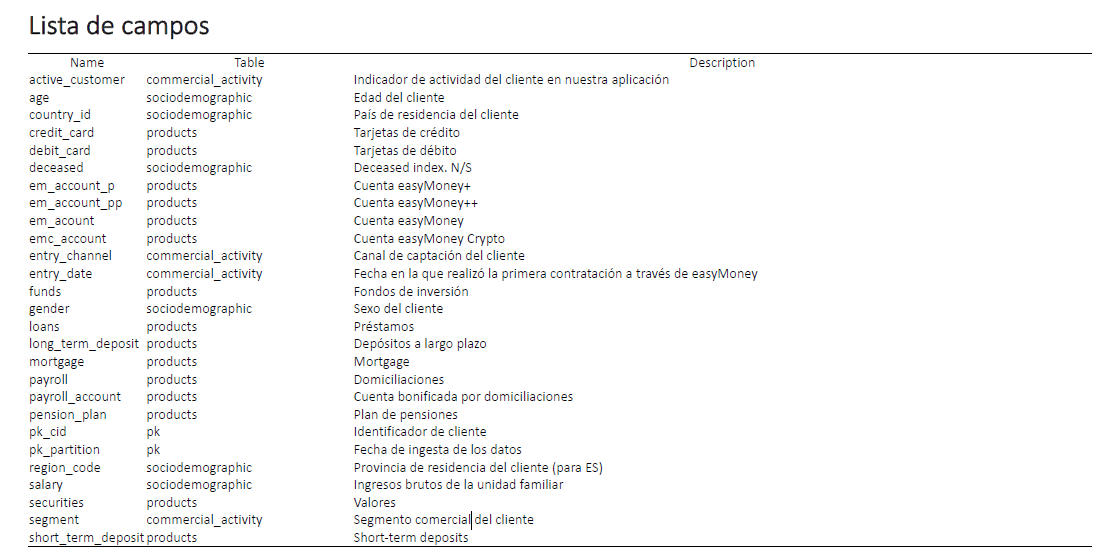

## Importación de librerías

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de Datos




In [ ]:
path_data = "/content/drive/MyDrive/TFM/data/"

In [ ]:
# Productos
products_df = pd.read_csv(path_data + "products_df.csv")

In [ ]:
# Información sociodemográfica
sociodemographic_df = pd.read_csv(path_data +"sociodemographic_df.csv")

In [ ]:
# Actividad Comercial
commercial_activity_df = pd.read_csv(path_data + "commercial_activity_df.csv")

### EDA - Productos




In [ ]:
products_df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0
securities,0,0,0,0,0
long_term_deposit,0,0,0,0,0
em_account_pp,0,0,0,0,0


In [ ]:
# 18 columnas, 14 de ellas representan los productos con un valor binario 0 / 1. Eliminamos la columna indíce por defecto en el momento de la exportación, y corregimos un pequeño error ortográfico
products_df.drop(['Unnamed: 0'], axis = 'columns', inplace=True)

In [ ]:
products_df.rename(columns={'em_acount': 'em_account'}, inplace=True)

In [ ]:
products_df.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
products_df.info()
# PK_CID es el identificador del cliente
# PK_PARTITION, es un fecha --> pasarlo a datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_account          int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:
# Nulos?
products_df.isnull().sum()

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_account             0
dtype: int64

In [ ]:
# Visualicemos las filas con esos nulos
products_df[products_df['payroll'].isna() & products_df['pension_plan'].isna()]
# Las filas con estos dos atributos nulos son las mismas, y además, el resto de productos no son contratados, pero igualmente imputaremos 0

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
20679,1023793,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
45769,1097831,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
51586,1132935,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
56072,1118340,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
102989,1266281,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174495,1164621,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1193187,1263889,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1194282,1261206,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
1199121,1251445,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0


In [ ]:
products_df[products_df.duplicated()]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account


In [ ]:
products_df["pk_partition"].value_counts().sort_index()
# hay 17 meses: de ENERO 2018 a MAYO 2019
# el número de registros es incremental con las fechas de las particiones

2018-01-28    239493
2018-02-28    242521
2018-03-28    245258
2018-04-28    247463
2018-05-28    249926
2018-06-28    252104
2018-07-28    339339
2018-08-28    352922
2018-09-28    375323
2018-10-28    402300
2018-11-28    416387
2018-12-28    422481
2019-01-28    426875
2019-02-28    431727
2019-03-28    436183
2019-04-28    439627
2019-05-28    442995
Name: pk_partition, dtype: int64

<Axes: >

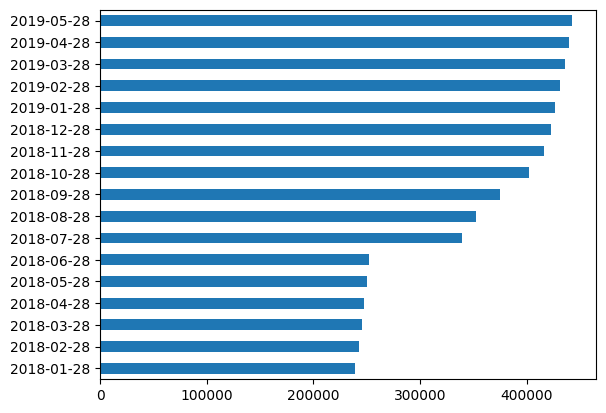

In [ ]:
products_df['pk_partition'].value_counts().sort_values().plot.barh()

In [ ]:
products_df["pk_cid"].value_counts()
#hay clientes que aparecen las 17 fechas, y otros que solamente aparecen 1 vez y no tiene porque ser en MAYO 2019, hay en fechas intermedias

1375586    17
1328781    17
1328783    17
1328784    17
1328786    17
           ..
1521045     1
1545224     1
1470941     1
1521049     1
1550586     1
Name: pk_cid, Length: 456373, dtype: int64

In [ ]:
#clientes únicos que han adquirido productos en algún mes
len(products_df['pk_cid'].unique())

456373

In [ ]:
#Nos interesa saber el número de productos activos en cada mes
products_df.groupby(['pk_partition'])['short_term_deposit','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_account'].sum()

#El producto Cuenta easyMoney++ nunca se ha vendido. El producto Cuenta easyMoney+ ha mantenido 2 por mes.
#El producto con más meses activo es la Cuenta easyMoney. Le siguen las tarjetas débito y  Domiciliaciones junto a la Cuenta bonificada por domiciliaciones (parecen correlacionadas)

<ipython-input-19-2dd475fe6109>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  products_df.groupby(['pk_partition'])['short_term_deposit','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_account'].sum()


,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
pk_partition,,,,,,,,,,,,,,,
2018-01-28,883,19,15,786,932,4884,0,3325,8145.0,8835.0,13478,15320,24696,2,215293
2018-02-28,1343,19,15,872,965,4956,0,3282,8889.0,9496.0,14246,15827,25448,2,217098
2018-03-28,1664,23,17,969,965,4965,0,3511,9735.0,9882.0,14989,16428,27046,2,218683
2018-04-28,1740,24,17,1084,983,5107,0,3725,9905.0,10560.0,15825,16947,27764,2,219816
2018-05-28,1455,27,18,1145,1012,5356,0,3797,9994.0,10148.0,16697,17569,27911,2,221291
2018-06-28,1244,27,19,1159,1019,5588,0,4002,10946.0,11635.0,15540,17950,28828,2,224328
2018-07-28,1282,28,20,1172,1053,5796,0,4137,11888.0,12779.0,16916,18185,29578,2,234324
2018-08-28,1335,29,20,1219,1133,5923,0,4206,11383.0,12126.0,18118,18333,29205,2,245980
2018-09-28,1386,31,20,1237,1201,6158,0,4289,11850.0,12624.0,18862,18618,31684,2,261210


In [ ]:
# Vamos a ver cómo es la evolución de un cliente(s) en concreto
products_df[products_df["pk_cid"] == 1375586]
# Cuenta easyMoney todo el tiempo. Durante diferentes meses ha tenido activa la Tarjeta Débito, y no ha contratado ningún otro producto

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
346322,1375586,2018-02-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
592407,1375586,2018-03-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
831104,1375586,2018-04-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1108457,1375586,2018-05-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1
1357280,1375586,2018-06-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1
1791360,1375586,2018-07-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1
1988936,1375586,2018-08-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2487565,1375586,2018-09-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2753984,1375586,2018-10-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
products_df[products_df["pk_cid"] == 1050613]
#Este cliente no está dado de alta durante 3 meses, y solo los 2 meses iniciales con productos contratados

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
472596,1050613,2018-02-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
693180,1050613,2018-03-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
1581538,1050613,2018-07-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
2050117,1050613,2018-08-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
2331062,1050613,2018-09-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
2673594,1050613,2018-10-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
3335098,1050613,2018-11-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
3416910,1050613,2018-12-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4162354,1050613,2019-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0


### EDA - Sociodemográfico

In [ ]:
sociodemographic_df.drop(['Unnamed: 0'], axis = 'columns', inplace=True)

In [ ]:
sociodemographic_df.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


In [ ]:
sociodemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


In [ ]:
sociodemographic_df.isnull().sum()
# Valores nulos para region_code, gender y salary

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [ ]:
sociodemographic_df[sociodemographic_df.duplicated()]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


In [ ]:
#Valores únicos para Pais
sociodemographic_df['country_id'].value_counts()

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
#Valores únicos para Región
sociodemographic_df['region_code'].value_counts()

28.0    1185757
8.0      600362
46.0     358142
30.0     296856
41.0     290447
15.0     254891
29.0     187911
36.0     175850
3.0      171358
11.0     160894
33.0     134562
50.0     132983
6.0      122587
35.0     121982
47.0     116948
18.0     102789
45.0     102328
37.0      92538
10.0      83283
14.0      75405
2.0       72071
21.0      72037
13.0      70092
39.0      69589
12.0      68709
7.0       62436
32.0      54639
27.0      52783
43.0      51782
17.0      50749
9.0       47746
25.0      46887
16.0      36094
24.0      35426
48.0      35256
26.0      34790
4.0       32680
31.0      31241
49.0      30965
23.0      30955
38.0      29001
34.0      27545
19.0      26762
40.0      21658
5.0       21300
22.0      21112
20.0      18833
1.0       12999
44.0      12616
42.0       8500
51.0       2896
52.0       2638
Name: region_code, dtype: int64

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]<150000]["age"].mean()

29.808541885991215

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>150000]["age"].mean()

30.583057372713533

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>1000000]["age"].mean()

31.48814439070426

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>5000000]["age"].mean()

32.23535253227408

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>10000000]["age"].mean()

30.209439528023598

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>20000000]["age"].mean()

27.629213483146067

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>28000000]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
1118605,1396113,2018-05-28,ES,28.0,V,25,N,28894395.51
1366031,1396113,2018-06-28,ES,28.0,V,25,N,28894395.51
1777762,1396113,2018-07-28,ES,28.0,V,25,N,28894395.51
1782564,1371668,2018-07-28,ES,28.0,H,45,N,28894395.51
1936341,1396113,2018-08-28,ES,28.0,V,25,N,28894395.51
2005009,1371668,2018-08-28,ES,28.0,H,45,N,28894395.51
2446137,1396113,2018-09-28,ES,28.0,V,25,N,28894395.51
2486788,1371668,2018-09-28,ES,28.0,H,45,N,28894395.51
2750378,1371668,2018-10-28,ES,28.0,H,45,N,28894395.51
2767586,1396113,2018-10-28,ES,28.0,V,25,N,28894395.51


In [ ]:
sociodemographic_df[sociodemographic_df["gender"] == "V"]["salary"].mean()

117169.98473941532

In [ ]:
sociodemographic_df[sociodemographic_df["gender"] == "H"]["salary"].mean()

114548.05478251034

####Gráfico género

<Axes: xlabel='pk_partition', ylabel='count'>

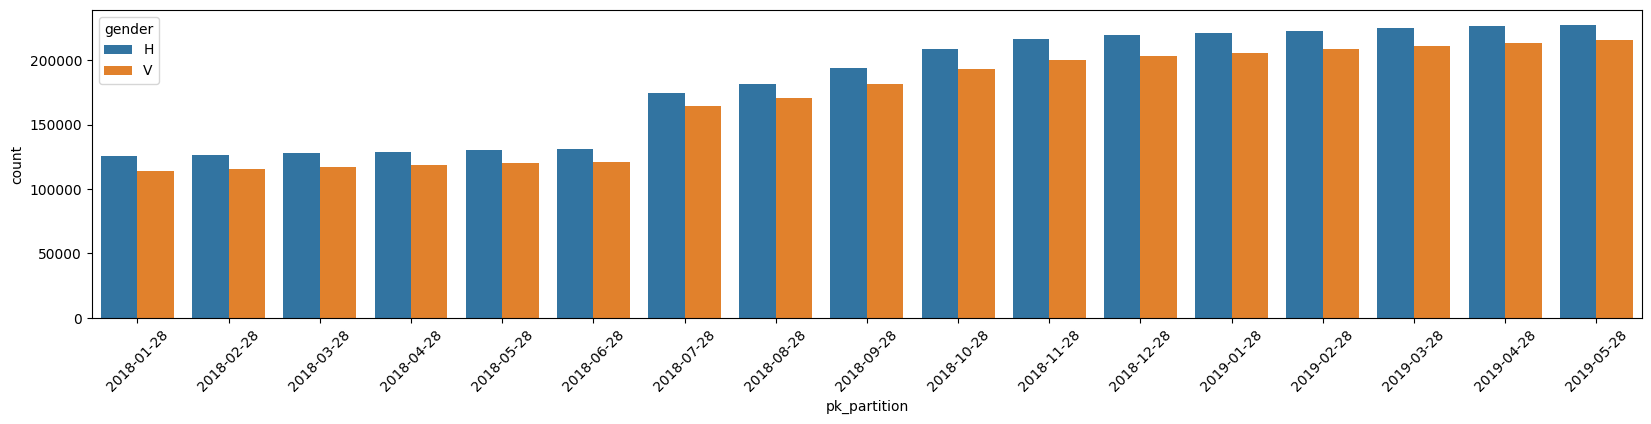

In [ ]:
plt.figure(figsize = [20,4])
plt.xticks(rotation=45)
sns.countplot(data = sociodemographic_df, x = 'pk_partition', hue = 'gender' )

In [ ]:
sociodemographic_df["salary"].isnull().value_counts()
# muchos nulos en salario

False    4450821
True     1512103
Name: salary, dtype: int64

In [ ]:
gb_region_code = sociodemographic_df.groupby("region_code")

In [ ]:
salary_region = gb_region_code["salary"].mean()

In [ ]:
salary_region.sort_values(ascending = False)
#podríamos imputar a los nulos la media de salario por region, es DONDE HAY MAYORES DIFERENCIAS ENTRE UNOS Y OTROS!!!!!!!!!!!!!!!!!!!!!!!!!

region_code
51.0    210924.284868
28.0    167790.324390
52.0    164500.738589
8.0     156785.600010
7.0     152945.926280
17.0    145738.510076
29.0    116581.385076
39.0    112270.459262
36.0    112187.778134
41.0    111174.385257
48.0    110240.939571
50.0    108007.388993
15.0    107903.404160
1.0     107097.955385
37.0    105715.992818
43.0    101690.510862
47.0     97237.209395
40.0     97150.593196
9.0      95441.090557
33.0     95391.038617
26.0     95018.003345
11.0     94807.234859
19.0     94628.963890
35.0     93739.467320
38.0     93580.266242
20.0     93044.495526
34.0     91757.906624
18.0     89385.082213
42.0     88452.139004
44.0     85628.938766
24.0     85359.135543
22.0     82724.979987
32.0     82619.228573
25.0     82249.439227
46.0     82228.164324
49.0     81467.722200
2.0      81459.513109
4.0      80959.079292
3.0      80143.536495
14.0     79902.932596
31.0     79183.299041
45.0     77517.311797
5.0      77258.389049
27.0     77145.329178
12.0     76538.62796

In [ ]:
gb_region_code["salary"].value_counts().isnull()

region_code  salary   
1.0          55271.07     False
             74453.79     False
             164007.12    False
             96967.65     False
             253563.27    False
                          ...  
52.0         71284.20     False
             173637.39    False
             49649.22     False
             75722.01     False
             123010.59    False
Name: salary, Length: 266006, dtype: bool

In [ ]:
sociodemographic_df[sociodemographic_df["salary"]>20000000]["region_code"].value_counts()

28.0    89
Name: region_code, dtype: int64

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>20]["salary"].mean()

115658.30920736454

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>30]["salary"].mean()

116421.88128867517

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>40]["salary"].mean()

123563.69398547684

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>50]["salary"].mean()

130748.12135781872

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>60]["salary"].mean()

136771.37295097153

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>70]["salary"].mean()

139524.59420510917

In [ ]:
sociodemographic_df[sociodemographic_df["age"]>90]["salary"].mean()

168930.29694826296

####Gráfico edad

<Axes: ylabel='age'>

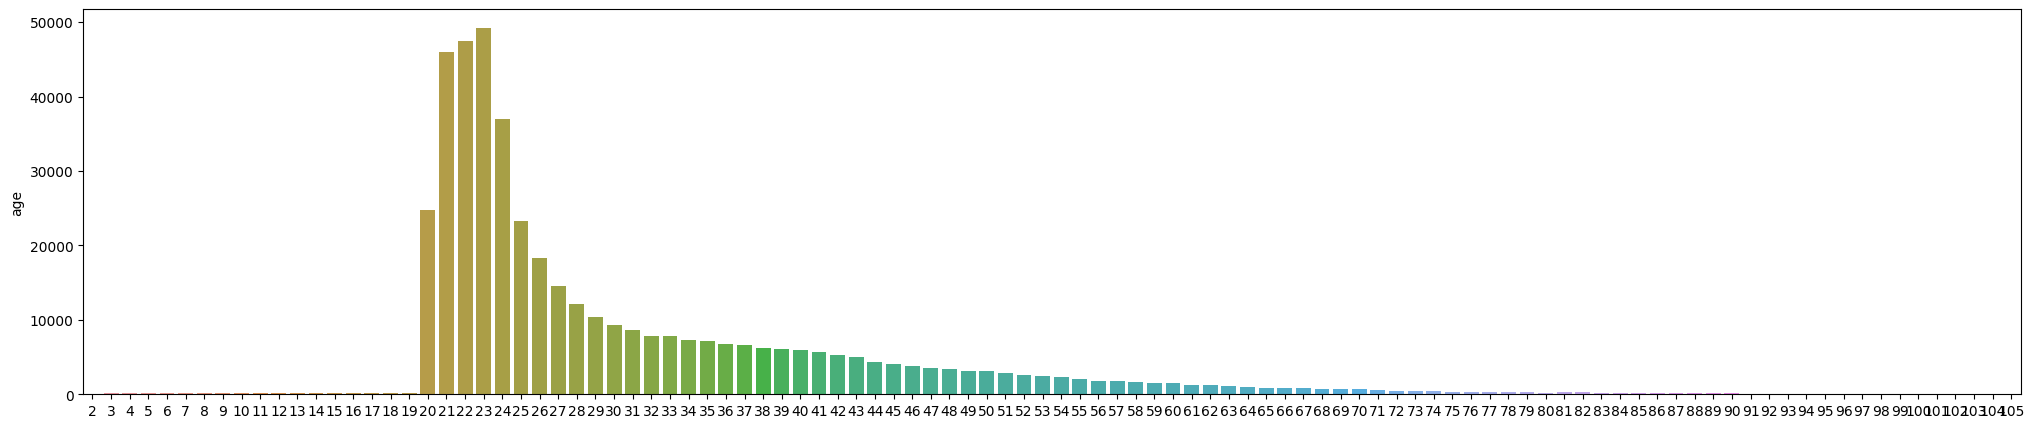

In [ ]:
#Edad de los clientes en la última fecha
dims = (25, 5)
fig= plt.subplots(figsize=dims)
sns.barplot(x=sociodemographic_df[sociodemographic_df['pk_partition'] == '2019-05-28'].age.value_counts().index, y=sociodemographic_df[sociodemographic_df['pk_partition'] == '2019-05-28'].age.value_counts())

### EDA - Actividad Comercial

In [ ]:
commercial_activity_df.drop(['Unnamed: 0'], axis = 'columns', inplace=True)

In [ ]:
commercial_activity_df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
commercial_activity_df.info()
# active_customer se puede pasar a booleano
# entry_date pasar a datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
commercial_activity_df.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

In [ ]:
commercial_activity_df[commercial_activity_df.duplicated()]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


In [ ]:
commercial_activity_df[commercial_activity_df["pk_cid"] == 1375586]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
346322,1375586,2018-02-28,2018-01-12,KHL,1.0,02 - PARTICULARES
592407,1375586,2018-03-28,2018-01-12,KHL,1.0,02 - PARTICULARES
831104,1375586,2018-04-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1108457,1375586,2018-05-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1357280,1375586,2018-06-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1791360,1375586,2018-07-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1988936,1375586,2018-08-28,2018-01-12,KHL,0.0,02 - PARTICULARES
2487565,1375586,2018-09-28,2018-01-12,KHL,0.0,02 - PARTICULARES
2753984,1375586,2018-10-28,2018-01-12,KHL,0.0,02 - PARTICULARES


In [ ]:
commercial_activity_df["entry_date"].describe()

count        5962924
unique          1499
top       2017-07-28
freq           57389
Name: entry_date, dtype: object

####Gráfico Active Customer

<Axes: xlabel='pk_partition', ylabel='count'>

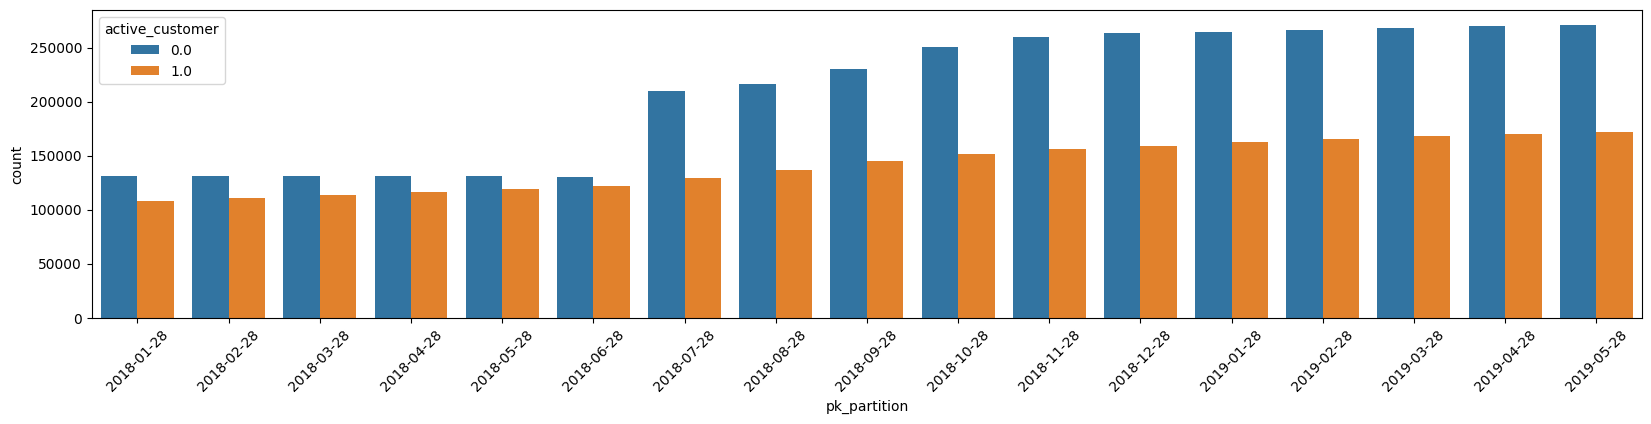

In [ ]:
plt.figure(figsize = [20,4])
plt.xticks(rotation=45)
sns.countplot(data = commercial_activity_df, x = 'pk_partition', hue = 'active_customer' )

####Gráfico segmento

<Axes: xlabel='pk_partition', ylabel='count'>

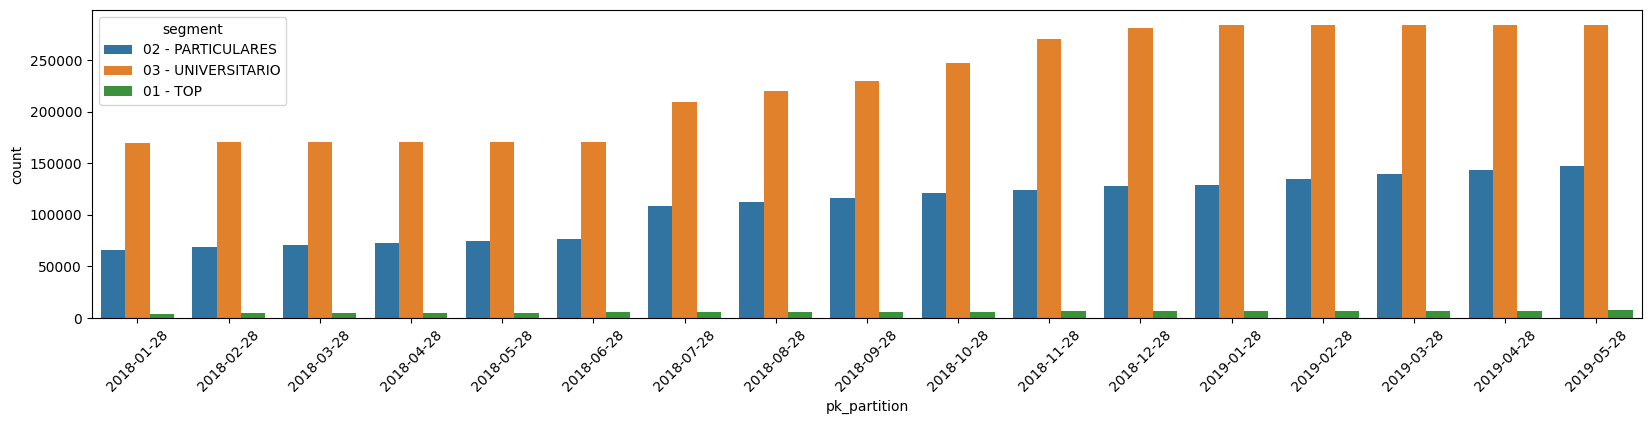

In [ ]:
plt.figure(figsize = [20,4])
plt.xticks(rotation=45)
sns.countplot(data = commercial_activity_df, x = 'pk_partition', hue = 'segment' )

## Data Preparation

###Dataframe único

In [ ]:
data1 = pd.merge(sociodemographic_df, commercial_activity_df, how="inner",on=['pk_cid', 'pk_partition'])

In [ ]:
data1.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   country_id       object 
 3   region_code      float64
 4   gender           object 
 5   age              int64  
 6   deceased         object 
 7   salary           float64
 8   entry_date       object 
 9   entry_channel    object 
 10  active_customer  float64
 11  segment          object 
dtypes: float64(3), int64(2), object(7)
memory usage: 591.4+ MB


In [ ]:
clientes = pd.merge(data1, products_df, how="inner",on=['pk_cid', 'pk_partition'])

In [ ]:
clientes.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,2018-01-12,KHL,...,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,2015-08-10,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,2015-08-10,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,2015-08-10,KHD,...,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,2015-08-10,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
clientes.tail()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
5962919,1166765,2019-05-28,ES,50.0,V,22,N,43912.17,2016-08-14,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
5962920,1166764,2019-05-28,ES,26.0,V,23,N,23334.99,2016-08-14,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
5962921,1166763,2019-05-28,ES,50.0,H,47,N,NaN,2016-08-14,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
5962922,1166789,2019-05-28,ES,50.0,H,22,N,199592.82,2016-08-14,KHE,...,0,0,0,0.0,0.0,0,0,0,0,1
5962923,1550586,2019-05-28,ES,28.0,H,37,N,NaN,2019-05-13,NaN,...,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   country_id          object 
 3   region_code         float64
 4   gender              object 
 5   age                 int64  
 6   deceased            object 
 7   salary              float64
 8   entry_date          object 
 9   entry_channel       object 
 10  active_customer     float64
 11  segment             object 
 12  short_term_deposit  int64  
 13  loans               int64  
 14  mortgage            int64  
 15  funds               int64  
 16  securities          int64  
 17  long_term_deposit   int64  
 18  em_account_pp       int64  
 19  credit_card         int64  
 20  payroll             float64
 21  pension_plan        float64
 22  payroll_account     int64  
 23  emc_account         int64  
 24  debit_card          int6

In [ ]:
#Ordenamos el Dataframe por Cliente y Partición
clientes = clientes.sort_values(by=['pk_cid', 'pk_partition'])
clientes.reset_index(inplace = True)

In [ ]:
#Los dataframes originales ya los podemos eliminar
del products_df, sociodemographic_df, commercial_activity_df

###Fechas

In [ ]:
# Nos da error al pasar la fecha de entrada a tipo de dato fecha debiso a la existencia del día 29 de febrero en años que no existe. LaAs pasamos al 28 de febrero.
clientes.loc[ (clientes['entry_date']=='2019-02-29'), 'entry_date']='2019-02-28'
clientes.loc[ (clientes['entry_date']=='2015-02-29'), 'entry_date']='2015-02-28'

In [ ]:
for i in ["pk_partition","entry_date"]:
    clientes[i]=pd.to_datetime(clientes[i], format='%Y-%m-%d')

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   country_id          object        
 4   region_code         float64       
 5   gender              object        
 6   age                 int64         
 7   deceased            object        
 8   salary              float64       
 9   entry_date          datetime64[ns]
 10  entry_channel       object        
 11  active_customer     float64       
 12  segment             object        
 13  short_term_deposit  int64         
 14  loans               int64         
 15  mortgage            int64         
 16  funds               int64         
 17  securities          int64         
 18  long_term_deposit   int64         
 19  em_account_pp       int64         
 20  cr

###Imputación de Nulos

In [ ]:
# Se pasa las columnas de productos a enteros (hay 2 que son Float), pero antes imputamos 0 a los productos con valor nulo
clientes['payroll'].fillna(0, inplace=True)
clientes['pension_plan'].fillna(0, inplace=True)
product_list = ['short_term_deposit','loans','mortgage','funds','securities','long_term_deposit','em_account_pp','credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card','em_account_p','em_account']
for i in product_list:
  clientes[i] = clientes[i].astype(int)
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   country_id          object        
 4   region_code         float64       
 5   gender              object        
 6   age                 int64         
 7   deceased            object        
 8   salary              float64       
 9   entry_date          datetime64[ns]
 10  entry_channel       object        
 11  active_customer     float64       
 12  segment             object        
 13  short_term_deposit  int64         
 14  loans               int64         
 15  mortgage            int64         
 16  funds               int64         
 17  securities          int64         
 18  long_term_deposit   int64         
 19  em_account_pp       int64         
 20  cr

In [ ]:
# A la región imputamos el valor extremo -999 a los valores nulos
print (clientes['region_code'].isnull().sum())
print (clientes[clientes['region_code'].isnull()].groupby('pk_cid').size())
clientes['region_code'].fillna(-999, inplace=True)


2264
pk_cid
130419     15
236611     11
534806     11
539016     17
670953      6
           ..
1519831     4
1528243     5
1530982     4
1542679     1
1544346     2
Length: 169, dtype: int64


In [ ]:
clientes['region_code'].isnull().sum()

0

In [ ]:
# Al canal de entrada imputamos el valor extremo ZZZ a los valores nulos
clientes['entry_channel'].fillna('ZZZ', inplace=True)

In [ ]:
# Al segmento imputaremos "04 - NOINFORMADO"
clientes['segment'].fillna('04 - NOINFORMADO',inplace=True)

In [ ]:
# Al género, solo son 2 clientes. Imputaremos "NoInformado"
print (clientes[clientes['gender'].isnull()].groupby('pk_cid').size())
clientes['gender'].fillna('NoInformado',inplace=True)

pk_cid
216507    10
476023    15
dtype: int64


In [ ]:
# La región la pasamos a entero
clientes['region_code'] = clientes['region_code'].astype(int)

In [ ]:
# Si el cliente está activo o no, lo pasamos a boolean
clientes['active_customer'] = clientes['active_customer'].astype(bool)

In [ ]:
# Si es fallecido o no lo convertimos a boolean
clientes['deceased'] = (clientes['deceased'] == 'S').astype(bool)

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   country_id          object        
 4   region_code         int64         
 5   gender              object        
 6   age                 int64         
 7   deceased            bool          
 8   salary              float64       
 9   entry_date          datetime64[ns]
 10  entry_channel       object        
 11  active_customer     bool          
 12  segment             object        
 13  short_term_deposit  int64         
 14  loans               int64         
 15  mortgage            int64         
 16  funds               int64         
 17  securities          int64         
 18  long_term_deposit   int64         
 19  em_account_pp       int64         
 20  cr

In [ ]:
# Imputaremos a los salarios con valor nulo la media de su región y su segmento
clientes["salary"] = clientes.groupby(["region_code", "segment"])[["salary"]].transform(lambda x: x.fillna(x.mean()))["salary"]

In [ ]:
clientes.isnull().sum()

index                    0
pk_cid                   0
pk_partition             0
country_id               0
region_code              0
gender                   0
age                      0
deceased                 0
salary                4226
entry_date               0
entry_channel            0
active_customer          0
segment                  0
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
em_account_pp            0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_account_p             0
em_account               0
dtype: int64

In [ ]:
clientes[clientes["region_code"] == 51]

,index,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_account
34352,239300,606307,2018-01-28,ES,51,H,73,False,303538.410000,2015-01-24,...,0,0,0,0,0,0,1,0,0,0
34353,239644,606307,2018-02-28,ES,51,H,73,False,303538.410000,2015-01-24,...,0,0,0,0,0,0,1,0,0,0
34354,482275,606307,2018-03-28,ES,51,H,73,False,303538.410000,2015-01-24,...,0,0,0,0,0,0,1,0,0,0
34355,727431,606307,2018-04-28,ES,51,H,73,False,303538.410000,2015-01-24,...,0,0,0,0,0,0,1,0,0,0
34356,1224470,606307,2018-05-28,ES,51,H,73,False,303538.410000,2015-01-24,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958716,5683064,1548215,2019-05-28,ES,51,V,52,False,223667.456205,2019-04-29,...,0,0,0,1,1,0,0,0,0,1
5959502,5678786,1549232,2019-05-28,ES,51,H,49,False,325446.205000,2019-05-06,...,0,0,0,0,0,0,0,0,0,1
5959507,5678781,1549238,2019-05-28,ES,51,H,59,False,325446.205000,2019-05-06,...,0,0,0,0,0,0,0,0,0,1
5960747,5678223,1550863,2019-05-28,ES,51,H,36,False,325446.205000,2019-05-16,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
clientes.isnull().sum()

index                    0
pk_cid                   0
pk_partition             0
country_id               0
region_code              0
gender                   0
age                      0
deceased                 0
salary                4226
entry_date               0
entry_channel            0
active_customer          0
segment                  0
short_term_deposit       0
loans                    0
mortgage                 0
funds                    0
securities               0
long_term_deposit        0
em_account_pp            0
credit_card              0
payroll                  0
pension_plan             0
payroll_account          0
emc_account              0
debit_card               0
em_account_p             0
em_account               0
dtype: int64

In [ ]:
#Los salarios nulos que aún quedaban, imputamos la media de su segmento
clientes[clientes.isna().any(axis=1)].T
clientes[(clientes["segment"] == "01 - TOP") & ((clientes["region_code"] ==20) | (clientes["region_code"] ==31) | (clientes["region_code"] ==51) | (clientes["region_code"] ==52))]
clientes["salary"] = clientes.groupby(["segment"])[["salary"]].transform(lambda x: x.fillna(x.mean()))["salary"]


In [ ]:
clientes.isnull().sum()

index                 0
pk_cid                0
pk_partition          0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
entry_date            0
entry_channel         0
active_customer       0
segment               0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_account            0
dtype: int64

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   pk_cid              int64         
 2   pk_partition        datetime64[ns]
 3   country_id          object        
 4   region_code         int64         
 5   gender              object        
 6   age                 int64         
 7   deceased            bool          
 8   salary              float64       
 9   entry_date          datetime64[ns]
 10  entry_channel       object        
 11  active_customer     bool          
 12  segment             object        
 13  short_term_deposit  int64         
 14  loans               int64         
 15  mortgage            int64         
 16  funds               int64         
 17  securities          int64         
 18  long_term_deposit   int64         
 19  em_account_pp       int64         
 20  cr

In [ ]:
clientes['pk_cid']=clientes['pk_cid'].astype('object')
clientes['region_code']=clientes['region_code'].astype('object')

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   pk_cid              object        
 2   pk_partition        datetime64[ns]
 3   country_id          object        
 4   region_code         object        
 5   gender              object        
 6   age                 int64         
 7   deceased            bool          
 8   salary              float64       
 9   entry_date          datetime64[ns]
 10  entry_channel       object        
 11  active_customer     bool          
 12  segment             object        
 13  short_term_deposit  int64         
 14  loans               int64         
 15  mortgage            int64         
 16  funds               int64         
 17  securities          int64         
 18  long_term_deposit   int64         
 19  em_account_pp       int64         
 20  cr

###Bajas y Altas por Mes

In [ ]:
def calc_dif_mes(df, columna):
    df[columna+'_pm']  = df.groupby('pk_cid')[columna].shift(1)
    df['dif_'+columna] = df[columna] - df[columna+'_pm']
    df.drop(columna+'_pm',axis=1,inplace=True)

In [ ]:
def monthly_subscriptions_unsubscriptions (df, columna):
    fig = plt.figure(figsize = (10, 8))
    altas_=df[df['dif_'+columna] == 1].groupby(['pk_partition'])['dif_'+columna].count()
    bajas_=df[df['dif_'+columna] == -1].groupby(['pk_partition'])['dif_'+columna].count()
    # No información para el primer mes
    totales_=df.groupby(['pk_partition'])['dif_'+columna].sum()
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=45)
    plt.plot(altas_, color = "green", label = "Altas mensuales")
    plt.plot(bajas_, color = "red", label = "Bajas mensuales")
    plt.plot(totales_, color = "blue", label = "Diferencia mensuales")
    plt.title("Altas, Bajas y Diferencia Mensual de: "+columna)
    plt.legend()

In [ ]:
product_list

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_account']

In [ ]:
for i in product_list:
    calc_dif_mes (clientes, i)

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 43 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   index                   int64         
 1   pk_cid                  object        
 2   pk_partition            datetime64[ns]
 3   country_id              object        
 4   region_code             object        
 5   gender                  object        
 6   age                     int64         
 7   deceased                bool          
 8   salary                  float64       
 9   entry_date              datetime64[ns]
 10  entry_channel           object        
 11  active_customer         bool          
 12  segment                 object        
 13  short_term_deposit      int64         
 14  loans                   int64         
 15  mortgage                int64         
 16  funds                   int64         
 17  securities              int64         
 18  lo

In [ ]:
clientes[clientes['pk_cid']==1375586][['pk_cid', 'pk_partition','debit_card','dif_debit_card']]

,pk_cid,pk_partition,debit_card,dif_debit_card
4751139,1375586,2018-01-28,0,NaN
4751140,1375586,2018-02-28,0,0.0
4751141,1375586,2018-03-28,0,0.0
4751142,1375586,2018-04-28,0,0.0
4751143,1375586,2018-05-28,1,1.0
4751144,1375586,2018-06-28,1,0.0
4751145,1375586,2018-07-28,1,0.0
4751146,1375586,2018-08-28,0,-1.0
4751147,1375586,2018-09-28,0,0.0
4751148,1375586,2018-10-28,0,0.0


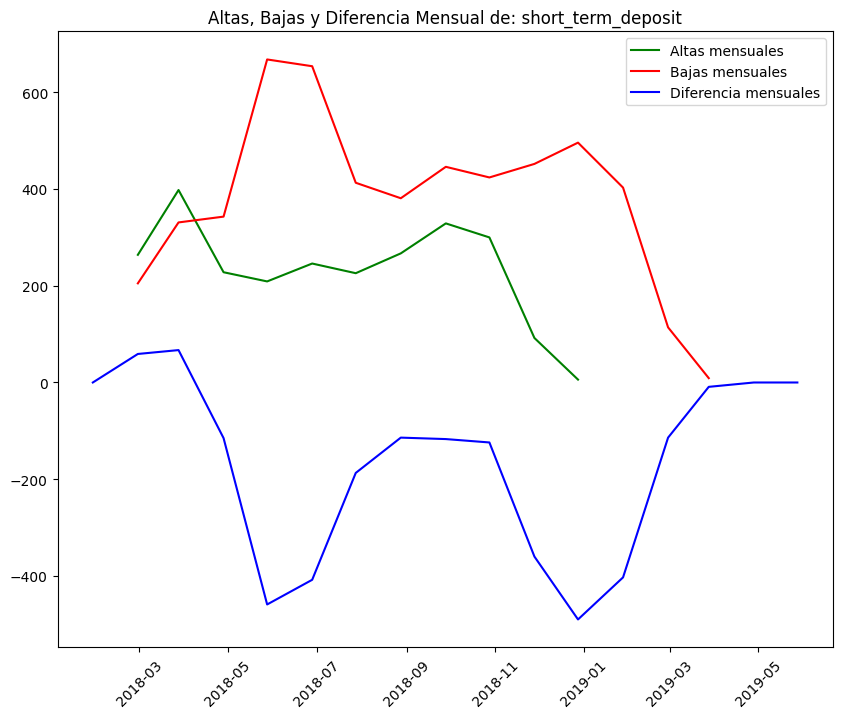

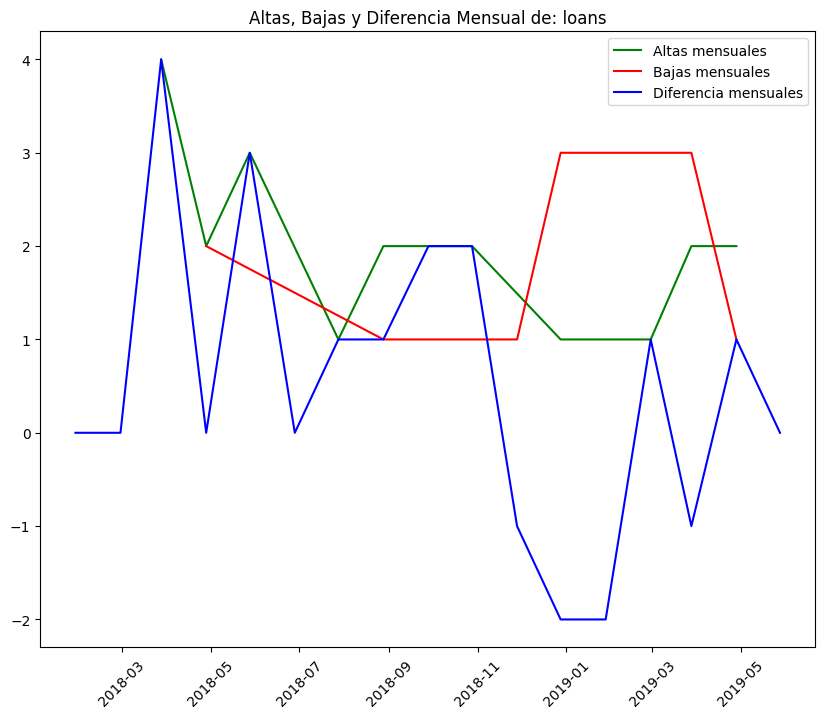

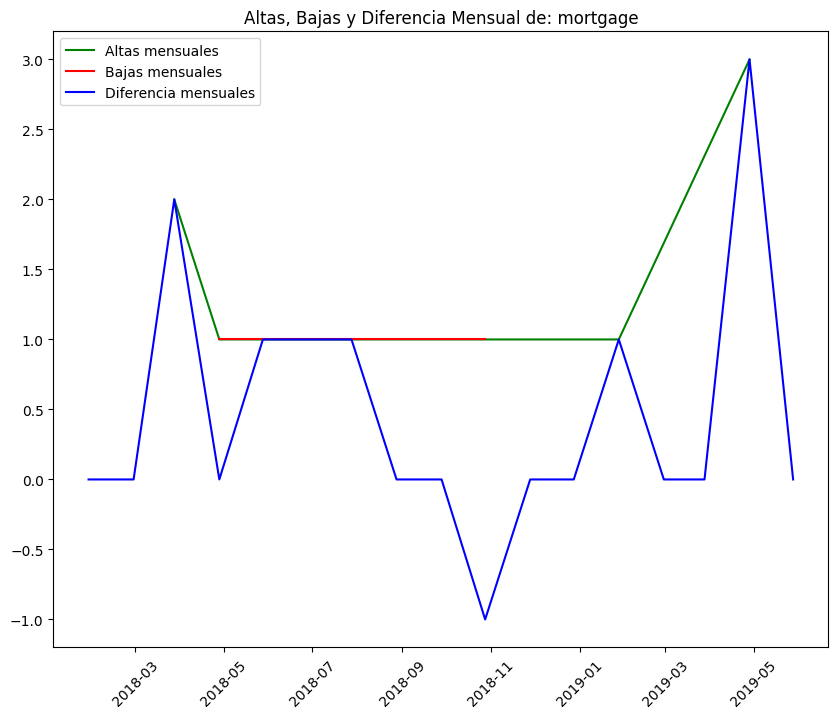

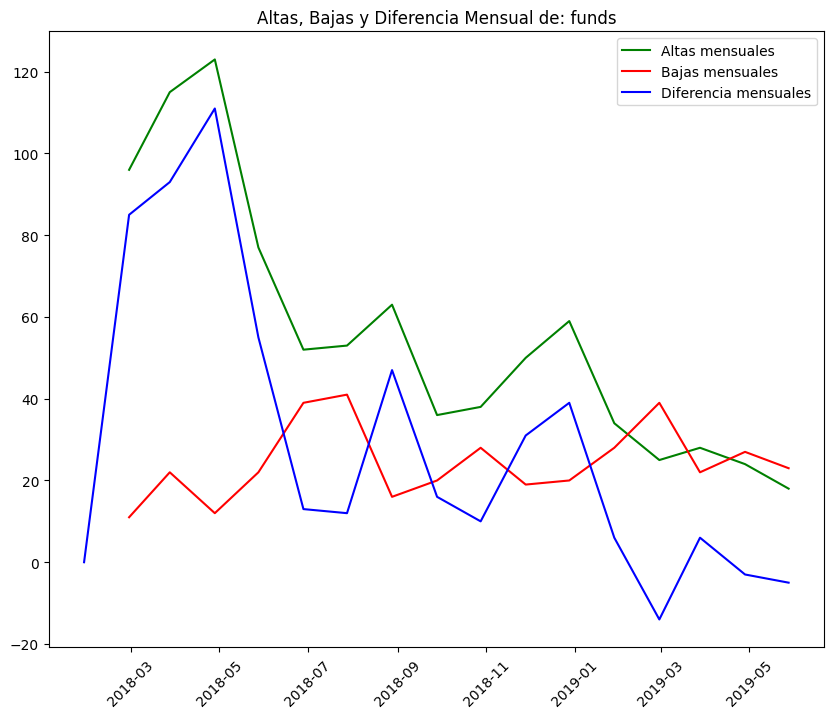

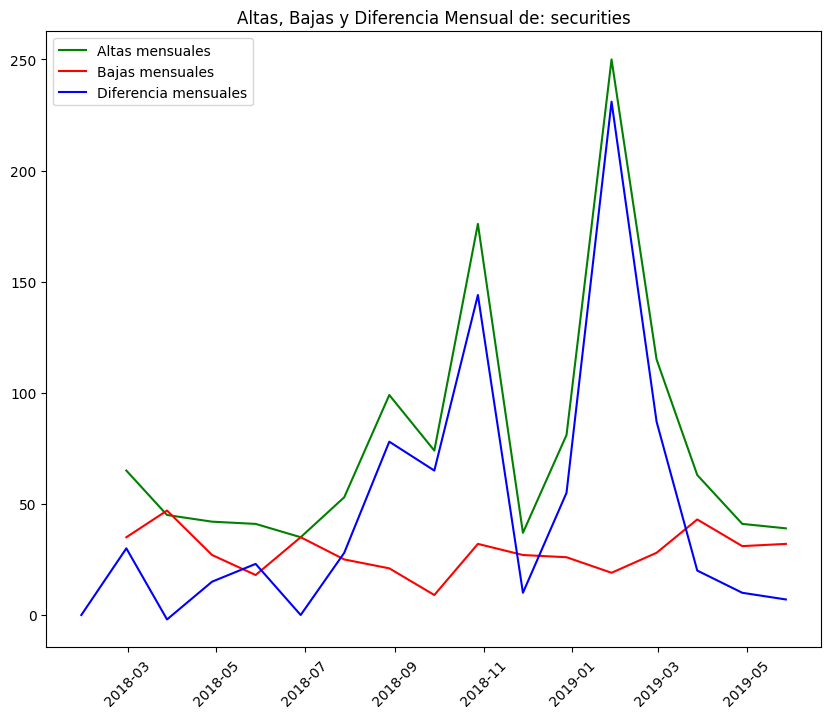

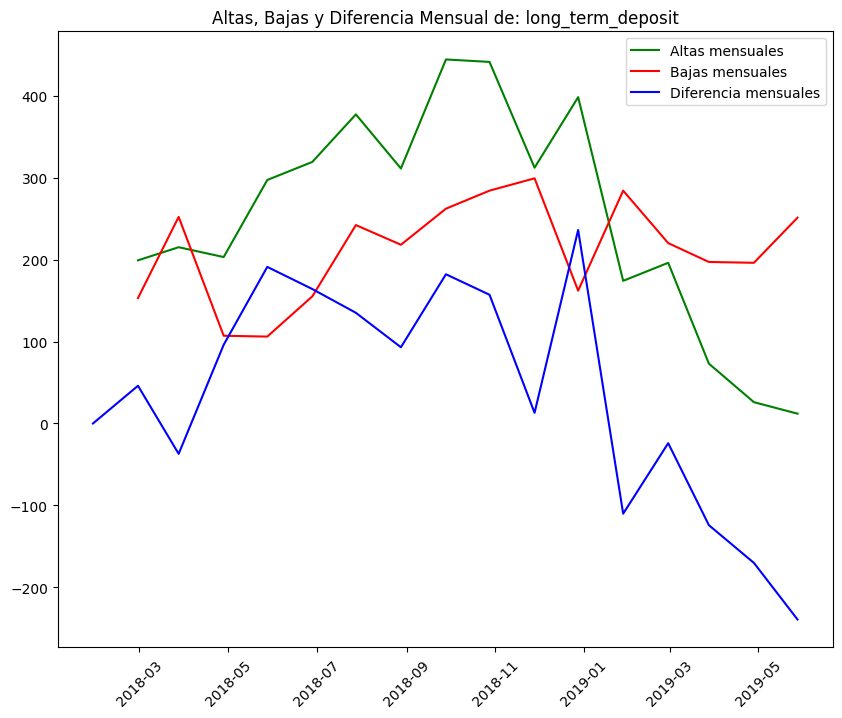

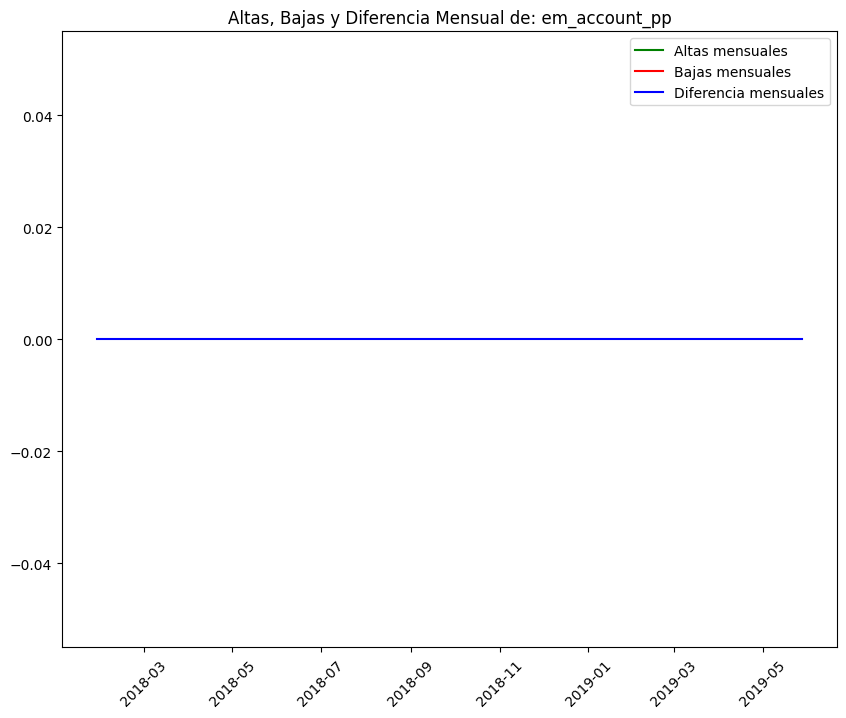

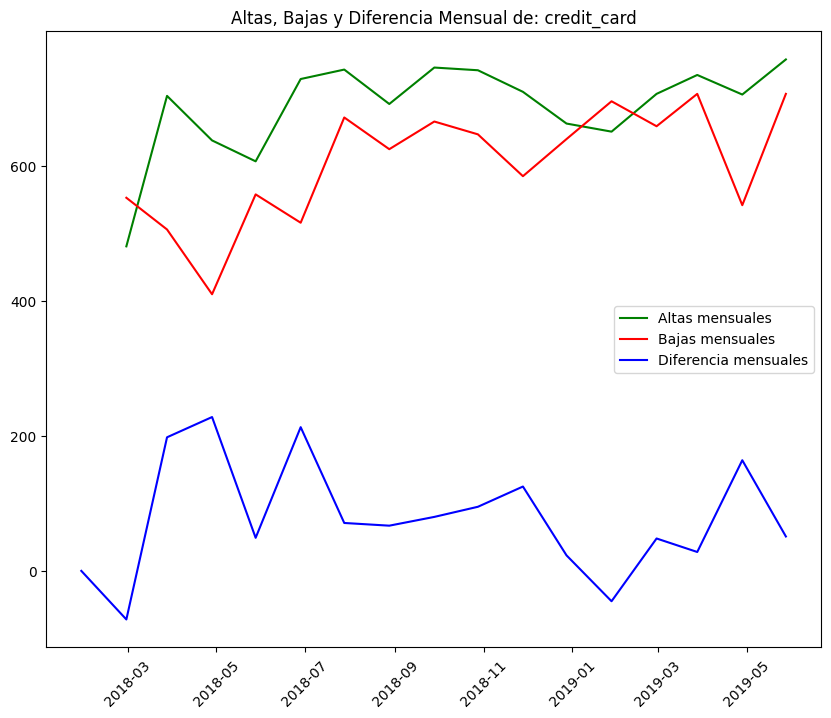

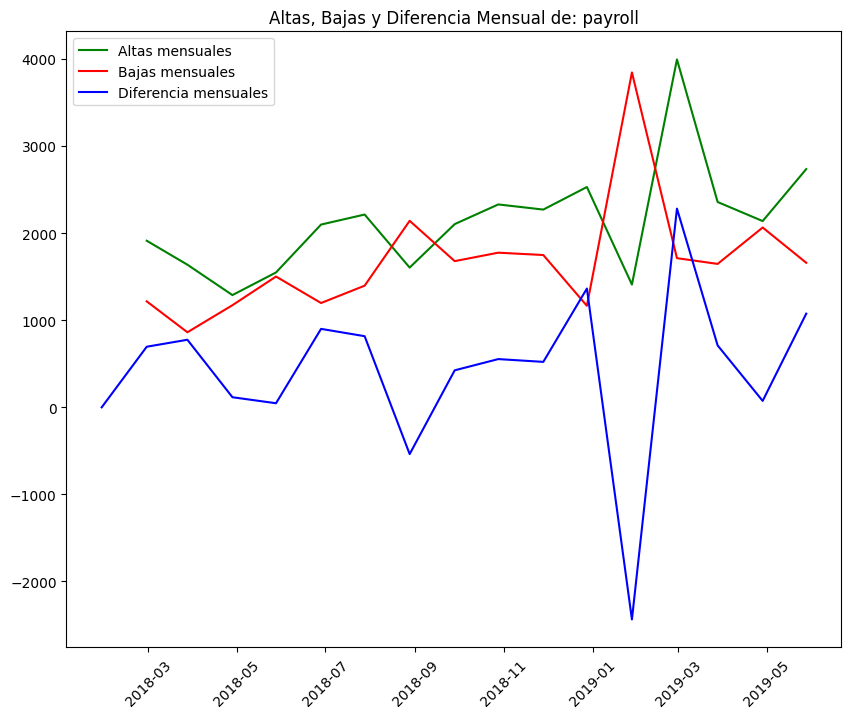

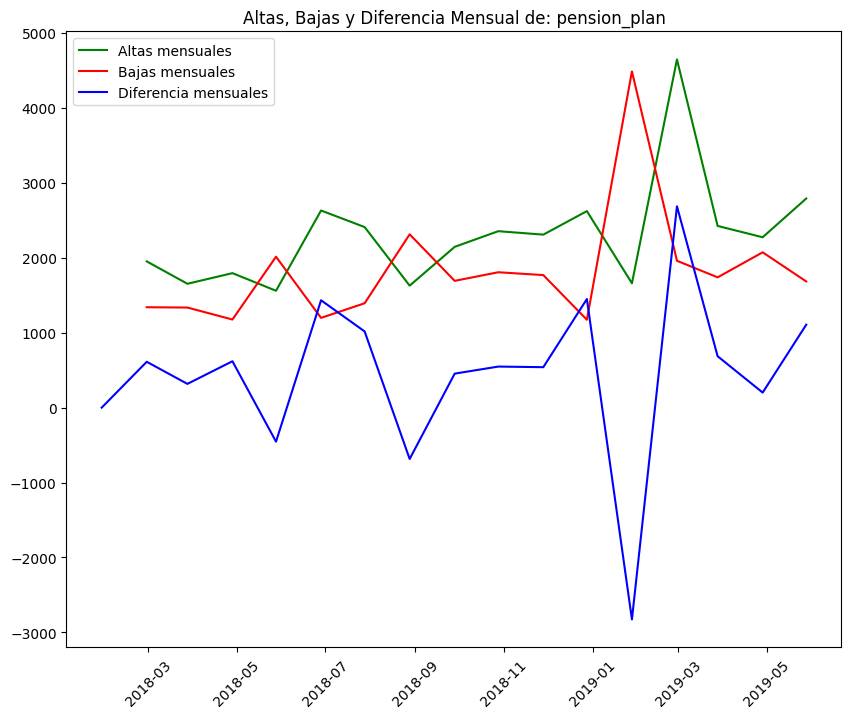

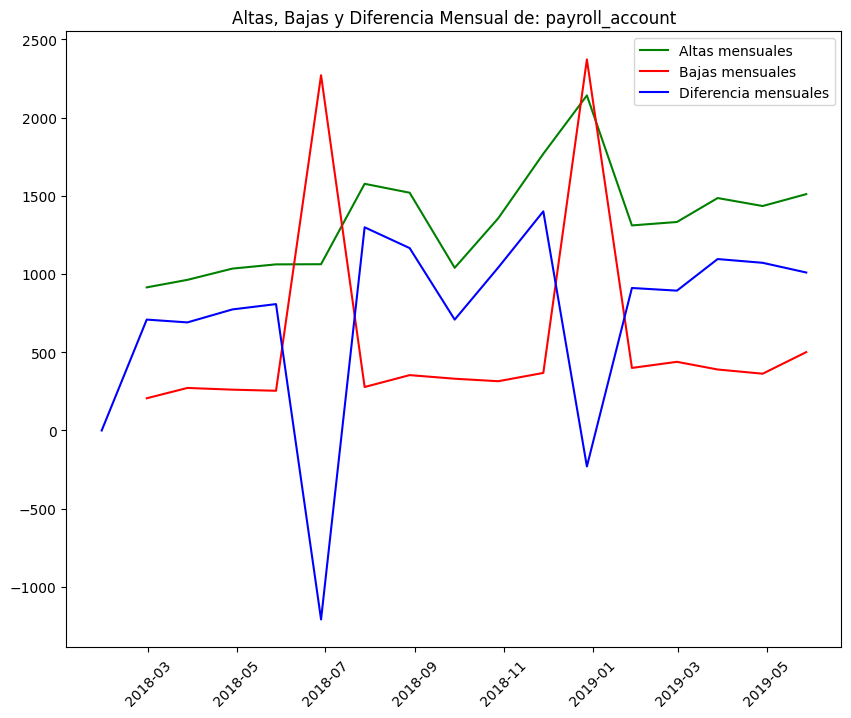

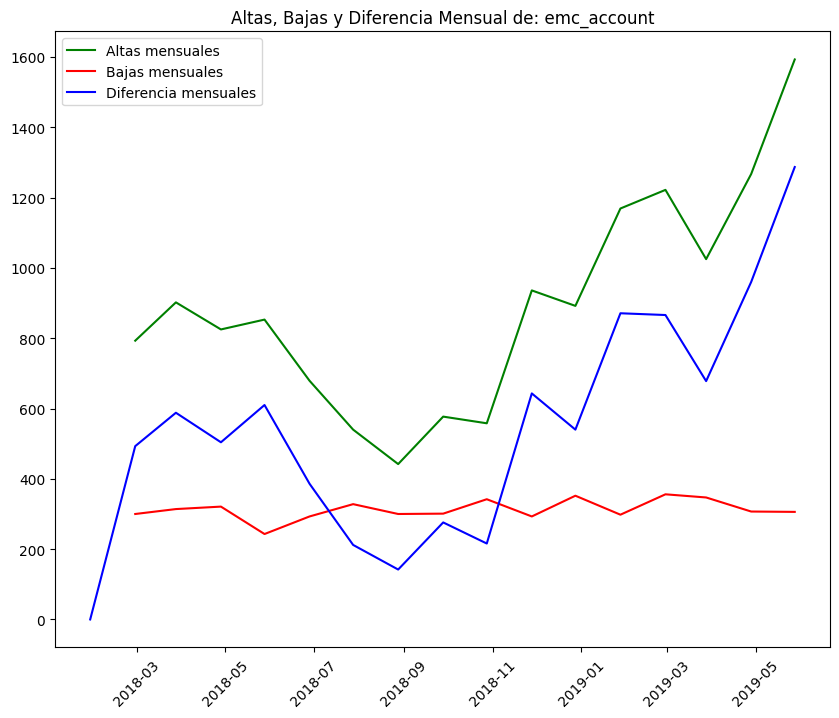

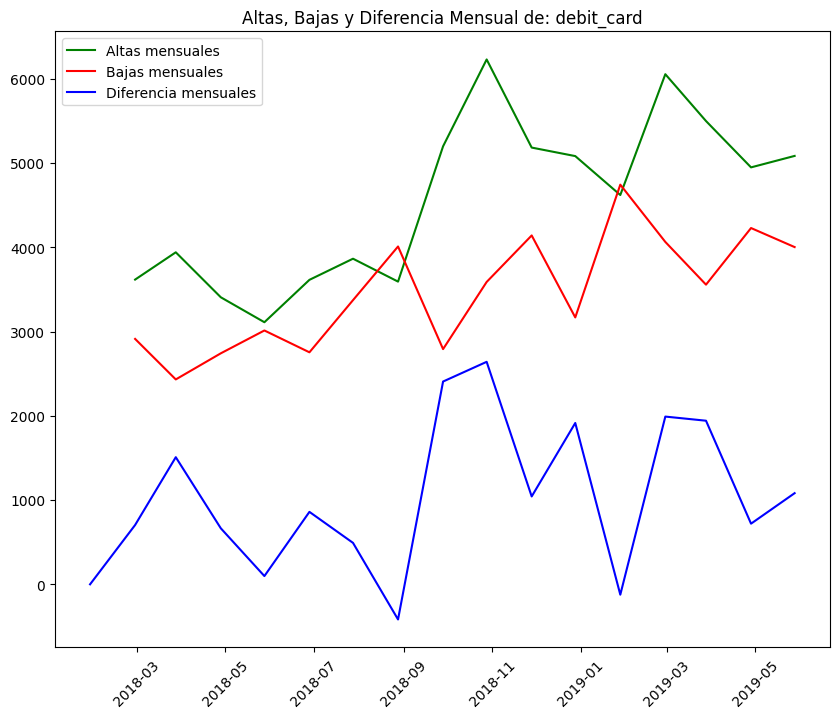

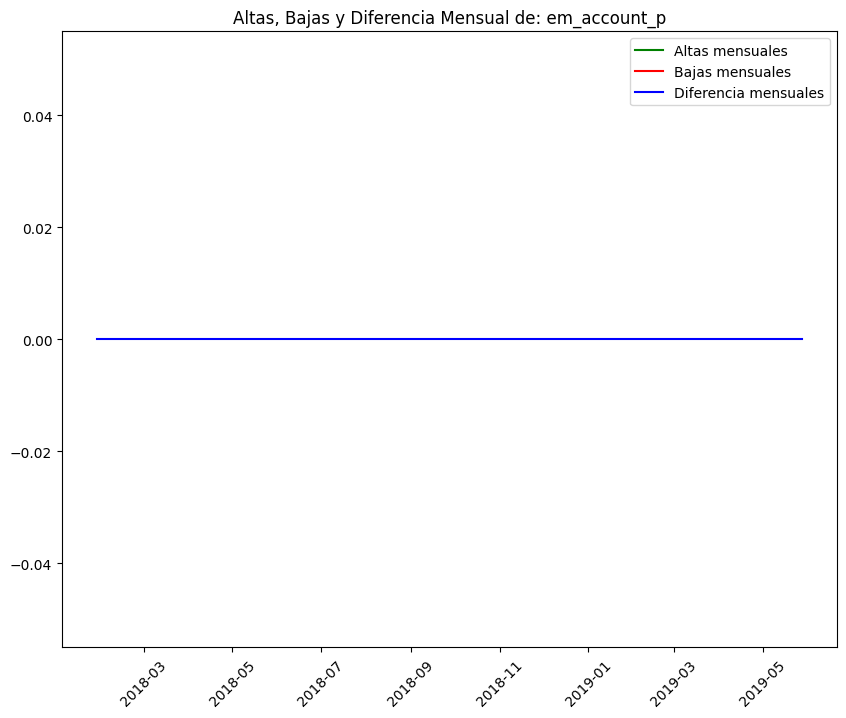

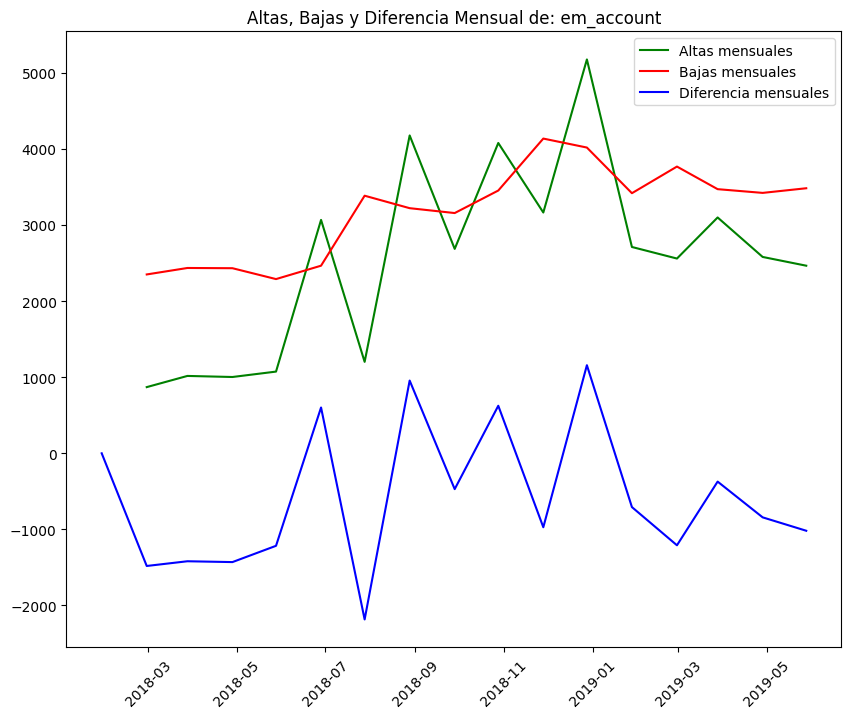

In [ ]:
for i in product_list:
    monthly_subscriptions_unsubscriptions (clientes, i)

###Variabilidad de productos x mes

In [ ]:
dif_products_list=['dif_short_term_deposit',
 'dif_loans',
 'dif_mortgage',
 'dif_funds',
 'dif_securities',
 'dif_long_term_deposit',
 'dif_em_account_pp',
 'dif_credit_card',
 'dif_payroll',
 'dif_pension_plan',
 'dif_payroll_account',
 'dif_emc_account',
 'dif_debit_card',
 'dif_em_account_p',
 'dif_em_account']

In [ ]:
#Vamos a crear una pivot table para hacer la suma por productos
df_altas_productos=clientes.pivot_table(index='pk_partition',values=dif_products_list, aggfunc=[np.sum])

In [ ]:
df_altas_productos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2018-01-28 to 2019-05-28
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (sum, dif_credit_card)         17 non-null     float64
 1   (sum, dif_debit_card)          17 non-null     float64
 2   (sum, dif_em_account)          17 non-null     float64
 3   (sum, dif_em_account_p)        17 non-null     float64
 4   (sum, dif_em_account_pp)       17 non-null     float64
 5   (sum, dif_emc_account)         17 non-null     float64
 6   (sum, dif_funds)               17 non-null     float64
 7   (sum, dif_loans)               17 non-null     float64
 8   (sum, dif_long_term_deposit)   17 non-null     float64
 9   (sum, dif_mortgage)            17 non-null     float64
 10  (sum, dif_payroll)             17 non-null     float64
 11  (sum, dif_payroll_account)     17 non-null     float64
 12  (sum, dif_pension_plan)        1

In [ ]:
df_altas_productos.columns=['credit_card',
                            'debit_card',
                            'em_account',
                            'em_account_p',
                            'em_acount_pp',
                            'emc_account',
                            'funds',
                            'loans',
                            'long_term_deposit',
                            'mortgage',
                            'payroll',
                            'payroll_account',
                            'pension_plan',
                            'securities',
                            "short_term_deposit"]

In [ ]:
df_altas_productos.reset_index(drop=False,inplace=True)

In [ ]:
df_altas_productos

,pk_partition,credit_card,debit_card,em_account,em_account_p,em_acount_pp,emc_account,funds,loans,long_term_deposit,mortgage,payroll,payroll_account,pension_plan,securities,short_term_deposit
0,2018-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-28,-72.0,704.0,-1481.0,0.0,0.0,493.0,85.0,0.0,46.0,0.0,696.0,709.0,612.0,30.0,59.0
2,2018-03-28,198.0,1509.0,-1419.0,0.0,0.0,588.0,93.0,4.0,-37.0,2.0,776.0,691.0,317.0,-2.0,67.0
3,2018-04-28,228.0,665.0,-1430.0,0.0,0.0,504.0,111.0,0.0,96.0,0.0,116.0,774.0,619.0,15.0,-115.0
4,2018-05-28,49.0,98.0,-1216.0,0.0,0.0,610.0,55.0,3.0,191.0,1.0,47.0,808.0,-454.0,23.0,-459.0
5,2018-06-28,213.0,860.0,602.0,0.0,0.0,386.0,13.0,0.0,164.0,1.0,901.0,-1208.0,1433.0,0.0,-408.0
6,2018-07-28,71.0,492.0,-2184.0,0.0,0.0,212.0,12.0,1.0,135.0,1.0,817.0,1299.0,1017.0,28.0,-187.0
7,2018-08-28,67.0,-417.0,956.0,0.0,0.0,142.0,47.0,1.0,93.0,0.0,-537.0,1166.0,-685.0,78.0,-114.0
8,2018-09-28,80.0,2407.0,-471.0,0.0,0.0,276.0,16.0,2.0,182.0,0.0,425.0,709.0,454.0,65.0,-117.0
9,2018-10-28,95.0,2641.0,625.0,0.0,0.0,216.0,10.0,2.0,157.0,-1.0,554.0,1042.0,548.0,144.0,-124.0


In [ ]:
df_altas_productos=df_altas_productos.melt(id_vars=['pk_partition'],
              value_vars=df_altas_productos.columns[1:],
              var_name='Product',
              value_name='Count')

In [ ]:
df_altas_productos

,pk_partition,Product,Count
0,2018-01-28,credit_card,0.0
1,2018-02-28,credit_card,-72.0
2,2018-03-28,credit_card,198.0
3,2018-04-28,credit_card,228.0
4,2018-05-28,credit_card,49.0
...,...,...,...
250,2019-01-28,short_term_deposit,-403.0
251,2019-02-28,short_term_deposit,-114.0
252,2019-03-28,short_term_deposit,-9.0
253,2019-04-28,short_term_deposit,0.0


In [ ]:
df_altas_productos.sort_values(by=['pk_partition','Product'],ascending=[True,False],inplace=True)

In [ ]:
evolucion_horizontal = px.bar(df_altas_productos, 
                              x="pk_partition", y="Count", color='Product', orientation='v', 
                              height=600,title='Variabilidad Productos', 
                              color_discrete_sequence = px.colors.cyclical.mygbm)
evolucion_horizontal.show()

###Clientes Nuevos

In [ ]:
# Para saber si los que contratan los productos cada mes son clientes nuevos o que ya existian
# Calcularemos los meses que desde que han sido clientes
clientes['meses_alta']=(clientes['pk_partition']-clientes['entry_date'])/np.timedelta64(1,'M')

In [ ]:
clientes.head().T

,0,1,2,3,4
index,1479563,2168122,2962973,3628236,4028169
pk_cid,15891,15891,16063,16063,16063
pk_partition,2018-07-28 00:00:00,2018-08-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00
country_id,ES,ES,ES,ES,ES
region_code,28,28,28,28,28
gender,H,H,H,H,H
age,59,59,62,62,62
deceased,False,False,False,False,False
salary,156438.979333,153086.517041,156438.979333,153086.517041,153086.517041
entry_date,2018-07-28 00:00:00,2018-07-28 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00


In [ ]:
len(clientes[clientes['meses_alta']<0])

10780

In [ ]:
clientes[clientes['meses_alta']<0].agg({'em_account':np.sum,
'loans':np.sum,
 'mortgage':np.sum,
 'funds':np.sum,
 'securities':np.sum,
 'long_term_deposit':np.sum,
 'em_account_pp':np.sum,
 'credit_card':np.sum,
 'payroll':np.sum,
 'pension_plan':np.sum,
 'payroll_account':np.sum,
 'emc_account':np.sum,
 'debit_card':np.sum,
 'em_account_p':np.sum,
 'em_account':np.sum})

em_account           928
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit     20
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account       13
emc_account            0
debit_card             0
em_account_p           0
dtype: int64

In [ ]:
clientes[clientes['meses_alta']<0]['meses_alta'].value_counts()

-0.065710    4707
-0.032855    4297
-0.098565    1776
Name: meses_alta, dtype: int64

In [ ]:
clientes['isNewClient']=((clientes['meses_alta'] < 1) & (clientes['meses_alta'] > 0)).astype(int)

In [ ]:
clientes.head().T

,0,1,2,3,4
index,1479563,2168122,2962973,3628236,4028169
pk_cid,15891,15891,16063,16063,16063
pk_partition,2018-07-28 00:00:00,2018-08-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00
country_id,ES,ES,ES,ES,ES
region_code,28,28,28,28,28
gender,H,H,H,H,H
age,59,59,62,62,62
deceased,False,False,False,False,False
salary,156438.979333,153086.517041,156438.979333,153086.517041,153086.517041
entry_date,2018-07-28 00:00:00,2018-07-28 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00


In [ ]:
clientes[clientes['pk_cid']==16502][['pk_cid', 'pk_partition','meses_alta','isNewClient','em_account','dif_em_account']].T

,15,16,17,18,19,20,21,22,23
pk_cid,16502,16502,16502,16502,16502,16502,16502,16502,16502
pk_partition,2018-09-28 00:00:00,2018-10-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2019-04-28 00:00:00,2019-05-28 00:00:00
meses_alta,-0.06571,0.919937,1.938438,2.924085,3.942586,4.961087,5.881024,6.899526,7.885172
isNewClient,0,1,0,0,0,0,0,0,0
em_account,0,1,1,1,1,1,1,1,1
dif_em_account,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


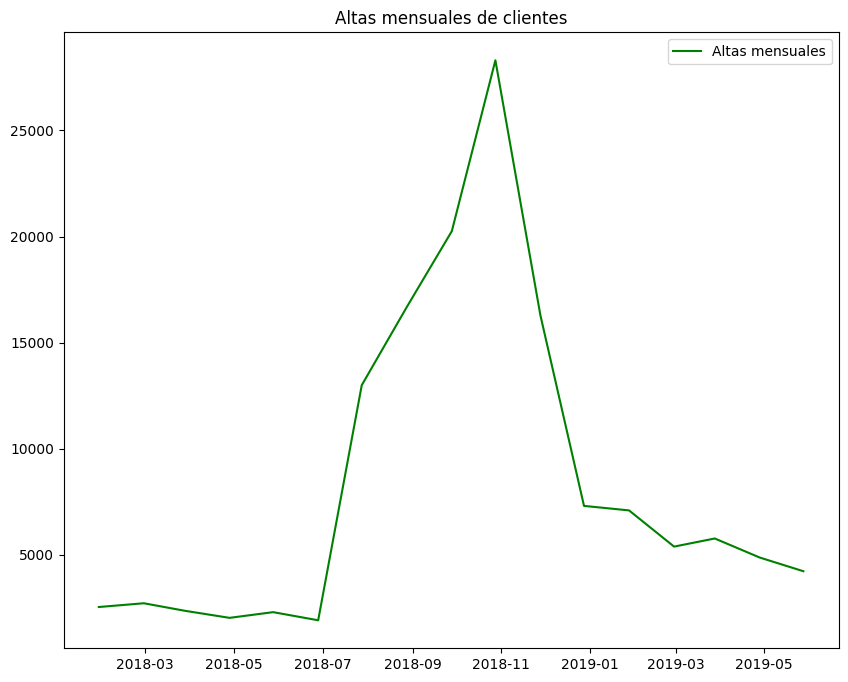

In [ ]:
altas_=clientes.groupby(['pk_partition'])['isNewClient'].sum()
fig = plt.figure(figsize = (10, 8))
plt.plot(altas_, color = "green", label = "Altas mensuales")
plt.title("Altas mensuales de clientes")
plt.legend()

In [ ]:
for i in product_list:
    clientes.loc[ (clientes['isNewClient']==1) & (clientes['dif_'+i].isnull()==True), 'dif_'+i]=clientes[i]

In [ ]:
clientes[clientes['pk_cid']==32560][['pk_cid', 'pk_partition','isNewClient','meses_alta','em_account','dif_em_account','debit_card','dif_debit_card']].T

,820,821,822,823,824,825
pk_cid,32560,32560,32560,32560,32560,32560
pk_partition,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2019-04-28 00:00:00,2019-05-28 00:00:00
isNewClient,1,0,0,0,0,0
meses_alta,0.887082,1.905583,2.924085,3.844021,4.862523,5.848169
em_account,1,1,1,1,1,1
dif_em_account,1.0,0.0,0.0,0.0,0.0,0.0
debit_card,1,1,1,1,1,1
dif_debit_card,1.0,0.0,0.0,0.0,0.0,0.0


####Altas productos - Nuevos Clientes

In [ ]:
df_altas_productos=clientes[clientes['isNewClient']==1].pivot_table(index='pk_partition',
                      values=dif_products_list, aggfunc=[np.sum])

In [ ]:
df_altas_productos.columns

MultiIndex([('sum',        'dif_credit_card'),
            ('sum',         'dif_debit_card'),
            ('sum',         'dif_em_account'),
            ('sum',       'dif_em_account_p'),
            ('sum',      'dif_em_account_pp'),
            ('sum',        'dif_emc_account'),
            ('sum',              'dif_funds'),
            ('sum',              'dif_loans'),
            ('sum',  'dif_long_term_deposit'),
            ('sum',           'dif_mortgage'),
            ('sum',            'dif_payroll'),
            ('sum',    'dif_payroll_account'),
            ('sum',       'dif_pension_plan'),
            ('sum',         'dif_securities'),
            ('sum', 'dif_short_term_deposit')],
           )

In [ ]:
df_altas_productos.columns=['credit_card',
                            'debit_card',
                            'em_account',
                            'em_account_p',
                            'em_acount_pp',
                            'emc_account',
                            'funds',
                            'loans',
                            'long_term_deposit',
                            'mortgage',
                            'payroll',
                            'payroll_account',
                            'pension_plan',
                            'securities',
                            "short_term_deposit"]

In [ ]:
df_altas_productos.reset_index(drop=False,inplace=True)

In [ ]:
df_altas_productos

,pk_partition,credit_card,debit_card,em_account,em_account_p,em_acount_pp,emc_account,funds,loans,long_term_deposit,mortgage,payroll,payroll_account,pension_plan,securities,short_term_deposit
0,2018-01-28,3.0,81.0,2297.0,0.0,0.0,6.0,3.0,0.0,26.0,0.0,30.0,30.0,30.0,5.0,156.0
1,2018-02-28,3.0,47.0,2374.0,0.0,0.0,6.0,1.0,0.0,22.0,0.0,25.0,33.0,25.0,2.0,376.0
2,2018-03-28,7.0,76.0,2122.0,0.0,0.0,7.0,2.0,0.0,27.0,0.0,51.0,34.0,52.0,1.0,206.0
3,2018-04-28,4.0,60.0,1788.0,0.0,0.0,8.0,2.0,1.0,36.0,0.0,31.0,33.0,34.0,2.0,162.0
4,2018-05-28,3.0,54.0,1977.0,0.0,0.0,5.0,5.0,0.0,46.0,0.0,23.0,34.0,23.0,3.0,162.0
5,2018-06-28,6.0,55.0,1722.0,0.0,0.0,2.0,0.0,0.0,49.0,0.0,34.0,33.0,36.0,5.0,149.0
6,2018-07-28,6.0,74.0,10264.0,0.0,0.0,5.0,1.0,0.0,56.0,0.0,50.0,38.0,50.0,4.0,196.0
7,2018-08-28,3.0,98.0,12867.0,0.0,0.0,7.0,0.0,0.0,38.0,0.0,51.0,48.0,55.0,3.0,193.0
8,2018-09-28,3.0,108.0,14970.0,0.0,0.0,10.0,2.0,0.0,50.0,0.0,49.0,40.0,51.0,3.0,196.0
9,2018-10-28,2.0,126.0,16515.0,0.0,0.0,14.0,2.0,0.0,70.0,0.0,69.0,53.0,70.0,5.0,160.0


In [ ]:
df_altas_productos=df_altas_productos.melt(id_vars=['pk_partition'],
              value_vars=df_altas_productos.columns[1:],
              var_name='Product',
              value_name='Count')

In [ ]:
df_altas_productos.sort_values(by=['pk_partition','Product'],ascending=[True,False],inplace=True)

In [ ]:
evolucion_horizontal = px.bar(df_altas_productos, 
                              x="pk_partition", y="Count", color='Product', orientation='v', 
                              height=600,title='Altas producto - Nuevos Clientes', 
                              color_discrete_sequence = px.colors.cyclical.mygbm)
evolucion_horizontal.show()

###Clientes Activos

In [ ]:
#Vamos a considerar que si un cliente no tiene producto, no es un cliente activo
clientes['isActive']=((clientes['loans']==0) &
                        (clientes['mortgage']==0) &
                        (clientes['funds']==0) &
                        (clientes['securities']==0) &
                        (clientes['long_term_deposit']==0) &
                        (clientes['em_account_pp']==0) &
                        (clientes['credit_card']==0) &
                        (clientes['payroll']==0) &
                        (clientes['pension_plan']==0) &
                        (clientes['payroll_account']==0) &
                        (clientes['emc_account']==0) &
                        (clientes['debit_card']==0) &
                        (clientes['em_account_p']==0) &
                        (clientes['em_account']==0)).astype(int)
#Queremos lo contrario
clientes['isActive']=(clientes['isActive']!=1).astype(int)

In [ ]:
clientes[clientes['pk_cid']==16502][['pk_cid', 'pk_partition','isNewClient','isActive','meses_alta','em_account','dif_em_account']]

,pk_cid,pk_partition,isNewClient,isActive,meses_alta,em_account,dif_em_account
15,16502,2018-09-28,0,0,-0.065710,0,NaN
16,16502,2018-10-28,1,1,0.919937,1,1.0
17,16502,2018-11-28,0,1,1.938438,1,0.0
18,16502,2018-12-28,0,1,2.924085,1,0.0
19,16502,2019-01-28,0,1,3.942586,1,0.0
20,16502,2019-02-28,0,1,4.961087,1,0.0
21,16502,2019-03-28,0,1,5.881024,1,0.0
22,16502,2019-04-28,0,1,6.899526,1,0.0
23,16502,2019-05-28,0,1,7.885172,1,0.0


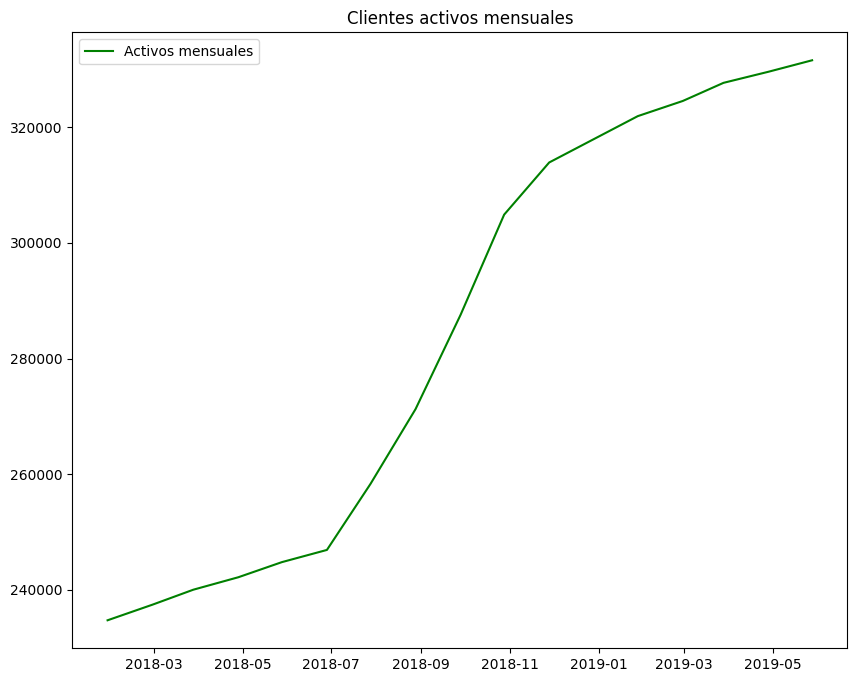

In [ ]:
altas_=clientes.groupby(['pk_partition'])['isActive'].sum()
fig = plt.figure(figsize = (10, 8))
plt.plot(altas_, color = "green", label = "Activos mensuales")
plt.title("Clientes activos mensuales")
plt.legend()

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 46 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   index                   int64         
 1   pk_cid                  object        
 2   pk_partition            datetime64[ns]
 3   country_id              object        
 4   region_code             object        
 5   gender                  object        
 6   age                     int64         
 7   deceased                bool          
 8   salary                  float64       
 9   entry_date              datetime64[ns]
 10  entry_channel           object        
 11  active_customer         bool          
 12  segment                 object        
 13  short_term_deposit      int64         
 14  loans                   int64         
 15  mortgage                int64         
 16  funds                   int64         
 17  securities              int64         
 18  lo

In [ ]:
# Nulos?
clientes.isnull().sum()

index                          0
pk_cid                         0
pk_partition                   0
country_id                     0
region_code                    0
gender                         0
age                            0
deceased                       0
salary                         0
entry_date                     0
entry_channel                  0
active_customer                0
segment                        0
short_term_deposit             0
loans                          0
mortgage                       0
funds                          0
securities                     0
long_term_deposit              0
em_account_pp                  0
credit_card                    0
payroll                        0
pension_plan                   0
payroll_account                0
emc_account                    0
debit_card                     0
em_account_p                   0
em_account                     0
dif_short_term_deposit    326034
dif_loans                 326034
dif_mortga

In [ ]:
#Imputaremos 0 a los nulos de las diferencias
dif_products_list=[
  'dif_short_term_deposit',
  'dif_loans',
 'dif_mortgage',
 'dif_funds',
 'dif_securities',
 'dif_long_term_deposit',
 'dif_em_account_pp',
 'dif_credit_card',
 'dif_payroll',
 'dif_pension_plan',
 'dif_payroll_account',
 'dif_emc_account',
 'dif_debit_card',
 'dif_em_account_p',
 'dif_em_account']


In [ ]:
for i in dif_products_list:
    clientes[i].fillna(0,inplace=True)

In [ ]:
# Nulos?
clientes.isnull().sum()

index                     0
pk_cid                    0
pk_partition              0
country_id                0
region_code               0
gender                    0
age                       0
deceased                  0
salary                    0
entry_date                0
entry_channel             0
active_customer           0
segment                   0
short_term_deposit        0
loans                     0
mortgage                  0
funds                     0
securities                0
long_term_deposit         0
em_account_pp             0
credit_card               0
payroll                   0
pension_plan              0
payroll_account           0
emc_account               0
debit_card                0
em_account_p              0
em_account                0
dif_short_term_deposit    0
dif_loans                 0
dif_mortgage              0
dif_funds                 0
dif_securities            0
dif_long_term_deposit     0
dif_em_account_pp         0
dif_credit_card     

In [ ]:
clientes.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,1479563,2168122,2962973,3628236,4028169,4480637,4876040,5134317,5523397,3628238
pk_cid,15891,15891,16063,16063,16063,16063,16063,16063,16063,16203
pk_partition,2018-07-28 00:00:00,2018-08-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2019-04-28 00:00:00,2019-05-28 00:00:00,2018-12-28 00:00:00
country_id,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
region_code,28,28,28,28,28,28,28,28,28,8
gender,H,H,H,H,H,H,H,H,H,V
age,59,59,62,62,62,62,62,62,62,70
deceased,False,False,False,False,False,False,False,False,False,False
salary,156438.979333,153086.517041,156438.979333,153086.517041,153086.517041,153086.517041,153086.517041,153086.517041,153086.517041,158409.507512
entry_date,2018-07-28 00:00:00,2018-07-28 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-12-23 00:00:00


####Altas productos - Clientes Activos

In [ ]:
df_altas_productos=clientes[clientes['isNewClient']==0].pivot_table(index='pk_partition',
                      values=dif_products_list, aggfunc=[np.sum])

In [ ]:
df_altas_productos.columns

MultiIndex([('sum',        'dif_credit_card'),
            ('sum',         'dif_debit_card'),
            ('sum',         'dif_em_account'),
            ('sum',       'dif_em_account_p'),
            ('sum',      'dif_em_account_pp'),
            ('sum',        'dif_emc_account'),
            ('sum',              'dif_funds'),
            ('sum',              'dif_loans'),
            ('sum',  'dif_long_term_deposit'),
            ('sum',           'dif_mortgage'),
            ('sum',            'dif_payroll'),
            ('sum',    'dif_payroll_account'),
            ('sum',       'dif_pension_plan'),
            ('sum',         'dif_securities'),
            ('sum', 'dif_short_term_deposit')],
           )

In [ ]:
df_altas_productos.columns=['credit_card',
                            'debit_card',
                            'em_account',
                            'em_account_p',
                            'em_acount_pp',
                            'emc_account',
                            'funds',
                            'loans',
                            'long_term_deposit',
                            'mortgage',
                            'payroll',
                            'payroll_account',
                            'pension_plan',
                            'securities',
                            "short_term_deposit"]

In [ ]:
df_altas_productos.reset_index(drop=False,inplace=True)

In [ ]:
df_altas_productos=df_altas_productos.melt(id_vars=['pk_partition'],
              value_vars=df_altas_productos.columns[1:],
              var_name='Product',
              value_name='Count')

In [ ]:
df_altas_productos.sort_values(by=['pk_partition','Product'],ascending=[True,False],inplace=True)

In [ ]:
evolucion_horizontal = px.bar(df_altas_productos, 
                              x="pk_partition", y="Count", color='Product', orientation='v', 
                              height=600,title='Variabilidad Productos', 
                              color_discrete_sequence = px.colors.cyclical.mygbm)
evolucion_horizontal.show()

###Total Productos por Cliente

In [ ]:
productos_contratados=clientes.melt(id_vars=['pk_partition','pk_cid'],
              value_vars = product_list,
              var_name='Product',
              value_name='Count')

In [ ]:
productos_contratados.head()

,pk_partition,pk_cid,Product,Count
0,2018-07-28,15891,short_term_deposit,0
1,2018-08-28,15891,short_term_deposit,0
2,2018-11-28,16063,short_term_deposit,0
3,2018-12-28,16063,short_term_deposit,0
4,2019-01-28,16063,short_term_deposit,0


In [ ]:
productos_contratados=productos_contratados.groupby(['pk_partition','pk_cid']).agg({'Count':np.sum}).reset_index(drop=False)

In [ ]:
productos_contratados.head()

,pk_partition,pk_cid,Count
0,2018-01-28,17457,2
1,2018-01-28,17799,1
2,2018-01-28,17970,4
3,2018-01-28,18704,1
4,2018-01-28,18956,0


In [ ]:
productos_contratados.rename(columns={'Count':'total_productos'}, inplace=True)

In [ ]:
len(clientes),len(productos_contratados)

(5962924, 5962924)

In [ ]:
clientes=pd.merge(clientes,productos_contratados, how="inner",on=['pk_cid','pk_partition'])

In [ ]:
clientes['total_productos'].value_counts().to_frame()

,total_productos
1,3995714
0,1121507
2,528593
3,150269
4,105720
5,42890
6,14809
7,2799
8,573
9,50


<Axes: >

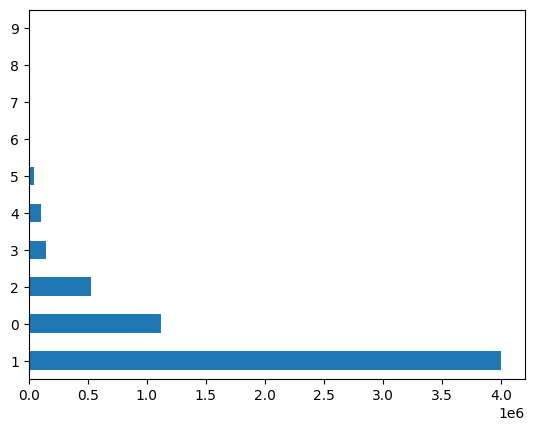

In [ ]:
# Resumen de los clientes con total de productos contratados
clientes['total_productos'].value_counts().plot(kind='barh')

In [ ]:
clientes[clientes['total_productos']==9].T

,233586,233587,233591,696908,696909,696913,696914,919347,919349,919353,...,2430915,2430916,2430917,2430918,2430919,2931500,3014809,3014810,3327203,3327204
index,1055562,1308153,2699699,694647,965399,2047754,2328656,711514,992474,2419319,...,2641373,3123923,3586948,4014111,4600385,3466030,1441195,1745405,2173132,2843787
pk_cid,1018436,1018436,1018436,1054409,1054409,1054409,1054409,1070525,1070525,1070525,...,1190607,1190607,1190607,1190607,1190607,1226958,1233988,1233988,1265402,1265402
pk_partition,2018-05-28 00:00:00,2018-06-28 00:00:00,2018-10-28 00:00:00,2018-03-28 00:00:00,2018-04-28 00:00:00,2018-08-28 00:00:00,2018-09-28 00:00:00,2018-03-28 00:00:00,2018-05-28 00:00:00,2018-09-28 00:00:00,...,2018-10-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2018-12-28 00:00:00,2018-06-28 00:00:00,2018-07-28 00:00:00,2018-09-28 00:00:00,2018-10-28 00:00:00
country_id,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,...,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
region_code,38,38,38,36,36,36,36,28,28,28,...,28,28,28,28,28,2,28,28,45,45
gender,V,V,V,V,V,V,V,V,V,V,...,V,V,V,V,V,V,V,V,V,V
age,37,37,37,36,36,36,36,47,47,47,...,34,34,34,34,34,46,53,53,29,29
deceased,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
salary,65458.23,65458.23,65458.23,145274.728109,145274.728109,145274.728109,145274.728109,91389.42,91389.42,91389.42,...,221878.65,221878.65,221878.65,221878.65,221878.65,81202.41106,174668.19,174668.19,43264.08,43264.08
entry_date,2015-06-04 00:00:00,2015-06-04 00:00:00,2015-06-04 00:00:00,2015-08-28 00:00:00,2015-08-28 00:00:00,2015-08-28 00:00:00,2015-08-28 00:00:00,2015-09-28 00:00:00,2015-09-28 00:00:00,2015-09-28 00:00:00,...,2017-01-09 00:00:00,2017-01-09 00:00:00,2017-01-09 00:00:00,2017-01-09 00:00:00,2017-01-09 00:00:00,2016-11-29 00:00:00,2016-12-24 00:00:00,2016-12-24 00:00:00,2017-06-25 00:00:00,2017-06-25 00:00:00


###Beneficios por producto

In [ ]:
clientes_ingresos = clientes.copy()
clientes_ingresos['debit_card_rev']=np.where(clientes_ingresos['dif_debit_card']<0,0,clientes_ingresos['dif_debit_card']*10)
clientes_ingresos['em_account_p_rev']=np.where(clientes_ingresos['dif_em_account_p']<0,0,clientes_ingresos['dif_em_account_p']*10)
clientes_ingresos['em_account_pp_rev']=np.where(clientes_ingresos['dif_em_account_pp']<0,0,clientes_ingresos['dif_em_account_pp']*10)
clientes_ingresos['em_account_rev']=np.where(clientes_ingresos['dif_em_account']<0,0,clientes_ingresos['dif_em_account']*10)
clientes_ingresos['emc_account_rev']=np.where(clientes_ingresos['dif_emc_account']<0,0,clientes_ingresos['dif_emc_account']*10)

clientes_ingresos['payroll_rev']=np.where(clientes_ingresos['dif_payroll']<0,0,clientes_ingresos['dif_payroll']*40)
clientes_ingresos['payroll_account_rev']=np.where(clientes_ingresos['dif_payroll_account']<0,0,clientes_ingresos['dif_payroll_account']*40)
clientes_ingresos['funds_rev']=np.where(clientes_ingresos['dif_funds']<0,0,clientes_ingresos['dif_funds']*40)
clientes_ingresos['short_term_deposit_rev']=np.where(clientes_ingresos['dif_short_term_deposit']<0,0,clientes_ingresos['dif_short_term_deposit']*40)
clientes_ingresos['long_term_deposit_rev']=np.where(clientes_ingresos['dif_long_term_deposit']<0,0,clientes_ingresos['dif_long_term_deposit']*40)
clientes_ingresos['pension_plan_rev']=np.where(clientes_ingresos['dif_pension_plan']<0,0,clientes_ingresos['dif_pension_plan']*40)
clientes_ingresos['securities_rev']=np.where(clientes_ingresos['dif_securities']<0,0,clientes_ingresos['dif_securities']*40)

clientes_ingresos['loans_rev']=np.where(clientes_ingresos['dif_loans']<0,0,clientes_ingresos['dif_loans']*60)
clientes_ingresos['credit_card_rev']=np.where(clientes_ingresos['dif_credit_card']<0,0,clientes_ingresos['dif_credit_card']*60)
clientes_ingresos['mortgage_rev']=np.where(clientes_ingresos['dif_mortgage']<0,0,clientes_ingresos['dif_mortgage']*60)

In [ ]:
clientes_ingresos.groupby('pk_partition')['credit_card_rev'].sum()

pk_partition
2018-01-28      180.0
2018-02-28    29040.0
2018-03-28    42660.0
2018-04-28    38520.0
2018-05-28    36600.0
2018-06-28    44100.0
2018-07-28    44940.0
2018-08-28    41640.0
2018-09-28    44940.0
2018-10-28    44580.0
2018-11-28    42780.0
2018-12-28    39840.0
2019-01-28    39180.0
2019-02-28    42480.0
2019-03-28    44460.0
2019-04-28    42720.0
2019-05-28    45660.0
Name: credit_card_rev, dtype: float64

In [ ]:
clientes_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 62 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   index                   int64         
 1   pk_cid                  object        
 2   pk_partition            datetime64[ns]
 3   country_id              object        
 4   region_code             object        
 5   gender                  object        
 6   age                     int64         
 7   deceased                bool          
 8   salary                  float64       
 9   entry_date              datetime64[ns]
 10  entry_channel           object        
 11  active_customer         bool          
 12  segment                 object        
 13  short_term_deposit      int64         
 14  loans                   int64         
 15  mortgage                int64         
 16  funds                   int64         
 17  securities              int64         
 18  lo

In [ ]:
clientes_ingresos = clientes_ingresos.groupby(['pk_partition'])['short_term_deposit_rev','loans_rev','mortgage_rev','funds_rev','securities_rev','long_term_deposit_rev','em_account_pp_rev','credit_card_rev','payroll_rev','pension_plan_rev','payroll_account_rev','emc_account_rev','debit_card_rev','em_account_p_rev','em_account_rev'].sum()


<ipython-input-158-150075dc3dc5>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
clientes_ingresos.head(17)

,short_term_deposit_rev,loans_rev,mortgage_rev,funds_rev,securities_rev,long_term_deposit_rev,em_account_pp_rev,credit_card_rev,payroll_rev,pension_plan_rev,payroll_account_rev,emc_account_rev,debit_card_rev,em_account_p_rev,em_account_rev
pk_partition,,,,,,,,,,,,,,,
2018-01-28,6240.0,0.0,0.0,120.0,200.0,1040.0,0.0,180.0,1200.0,1200.0,1200.0,60.0,810.0,0.0,22970.0
2018-02-28,25240.0,0.0,0.0,3880.0,2680.0,8840.0,0.0,29040.0,77480.0,79040.0,37920.0,7990.0,36620.0,0.0,32480.0
2018-03-28,24000.0,240.0,120.0,4680.0,1840.0,9680.0,0.0,42660.0,67440.0,68080.0,39800.0,9090.0,40140.0,0.0,31440.0
2018-04-28,15280.0,180.0,60.0,5000.0,1760.0,9560.0,0.0,38520.0,52720.0,73080.0,42680.0,8330.0,34670.0,0.0,27950.0
2018-05-28,14240.0,180.0,60.0,3280.0,1760.0,13520.0,0.0,36600.0,62720.0,63160.0,43720.0,8570.0,31570.0,0.0,30690.0
2018-06-28,15800.0,0.0,60.0,2080.0,1600.0,14720.0,0.0,44100.0,85280.0,106640.0,43840.0,6810.0,36680.0,0.0,47900.0
2018-07-28,16680.0,60.0,60.0,2160.0,2240.0,17200.0,0.0,44940.0,90560.0,98400.0,64600.0,5450.0,39350.0,0.0,114750.0
2018-08-28,17240.0,120.0,0.0,2520.0,4040.0,13800.0,0.0,41640.0,65680.0,66600.0,62240.0,4480.0,36580.0,0.0,146730.0
2018-09-28,19800.0,120.0,0.0,1520.0,3040.0,19640.0,0.0,44940.0,85840.0,87600.0,43000.0,5860.0,52850.0,0.0,173870.0


In [ ]:
clientes_ingresos ['Total_Ingresos'] = clientes_ingresos.sum(axis=1)

In [ ]:
clientes_ingresos.head(15)

,short_term_deposit_rev,loans_rev,mortgage_rev,funds_rev,securities_rev,long_term_deposit_rev,em_account_pp_rev,credit_card_rev,payroll_rev,pension_plan_rev,payroll_account_rev,emc_account_rev,debit_card_rev,em_account_p_rev,em_account_rev,Total_Ingresos
pk_partition,,,,,,,,,,,,,,,,
2018-01-28,6240.0,0.0,0.0,120.0,200.0,1040.0,0.0,180.0,1200.0,1200.0,1200.0,60.0,810.0,0.0,22970.0,35220.0
2018-02-28,25240.0,0.0,0.0,3880.0,2680.0,8840.0,0.0,29040.0,77480.0,79040.0,37920.0,7990.0,36620.0,0.0,32480.0,341210.0
2018-03-28,24000.0,240.0,120.0,4680.0,1840.0,9680.0,0.0,42660.0,67440.0,68080.0,39800.0,9090.0,40140.0,0.0,31440.0,339210.0
2018-04-28,15280.0,180.0,60.0,5000.0,1760.0,9560.0,0.0,38520.0,52720.0,73080.0,42680.0,8330.0,34670.0,0.0,27950.0,309790.0
2018-05-28,14240.0,180.0,60.0,3280.0,1760.0,13520.0,0.0,36600.0,62720.0,63160.0,43720.0,8570.0,31570.0,0.0,30690.0,310070.0
2018-06-28,15800.0,0.0,60.0,2080.0,1600.0,14720.0,0.0,44100.0,85280.0,106640.0,43840.0,6810.0,36680.0,0.0,47900.0,405510.0
2018-07-28,16680.0,60.0,60.0,2160.0,2240.0,17200.0,0.0,44940.0,90560.0,98400.0,64600.0,5450.0,39350.0,0.0,114750.0,496450.0
2018-08-28,17240.0,120.0,0.0,2520.0,4040.0,13800.0,0.0,41640.0,65680.0,66600.0,62240.0,4480.0,36580.0,0.0,146730.0,461670.0
2018-09-28,19800.0,120.0,0.0,1520.0,3040.0,19640.0,0.0,44940.0,85840.0,87600.0,43000.0,5860.0,52850.0,0.0,173870.0,538080.0


In [ ]:
clientes_ingresos['Total_Ingresos']

pk_partition
2018-01-28     35220.0
2018-02-28    341210.0
2018-03-28    339210.0
2018-04-28    309790.0
2018-05-28    310070.0
2018-06-28    405510.0
2018-07-28    496450.0
2018-08-28    461670.0
2018-09-28    538080.0
2018-10-28    594230.0
2018-11-28    501990.0
2018-12-28    504580.0
2019-01-28    360550.0
2019-02-28    584700.0
2019-03-28    425750.0
2019-04-28    391080.0
2019-05-28    439970.0
Name: Total_Ingresos, dtype: float64

<Axes: xlabel='pk_partition'>

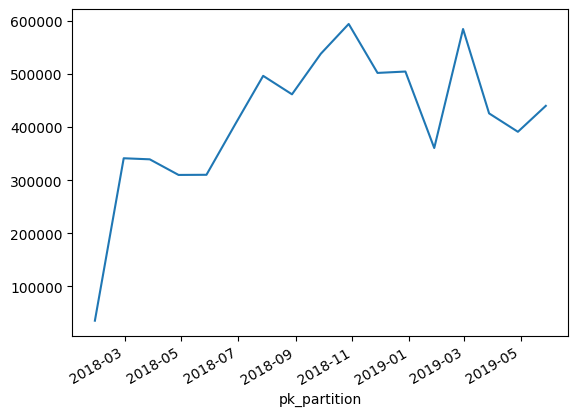

In [ ]:
clientes_ingresos['Total_Ingresos'].plot()


###Productos por genero

In [ ]:
#Solo veremos un par de productos como se comporta por genero
df_pt = pd.pivot_table(clientes[clientes['dif_payroll'] == 1], index='pk_partition', columns='gender', values='pk_cid', aggfunc='count')
df_pt.head()

gender,H,V
pk_partition,,
2018-01-28,10,20
2018-02-28,856,1081
2018-03-28,760,926
2018-04-28,647,671
2018-05-28,722,846


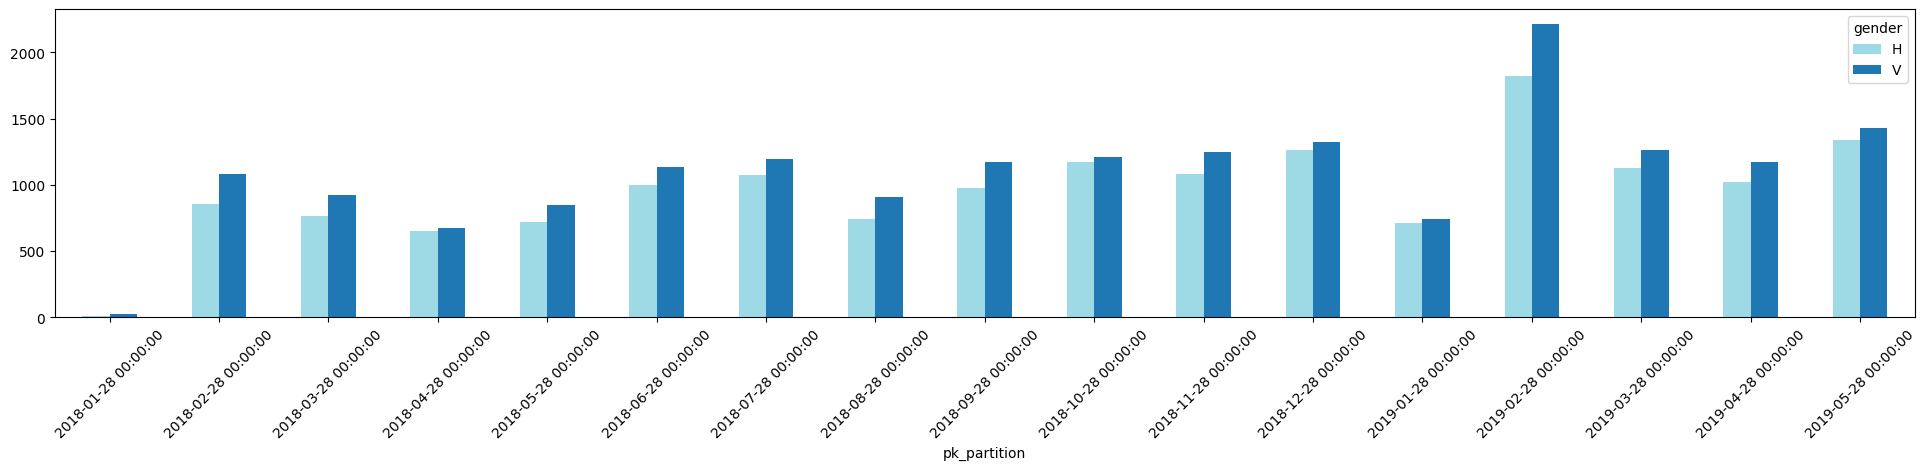

In [ ]:
df_pt.plot.bar(stacked=False, figsize = [24,4], colormap='tab20_r')
plt.xticks(rotation=45)
plt.verbose = False

In [ ]:
df_pt1 = pd.pivot_table(clientes[clientes['dif_pension_plan'] == 1], index='pk_partition', columns='gender', values='pk_cid', aggfunc='count')
df_pt1.head()

gender,H,V
pk_partition,,
2018-01-28,10,20
2018-02-28,870,1106
2018-03-28,771,931
2018-04-28,889,938
2018-05-28,724,855


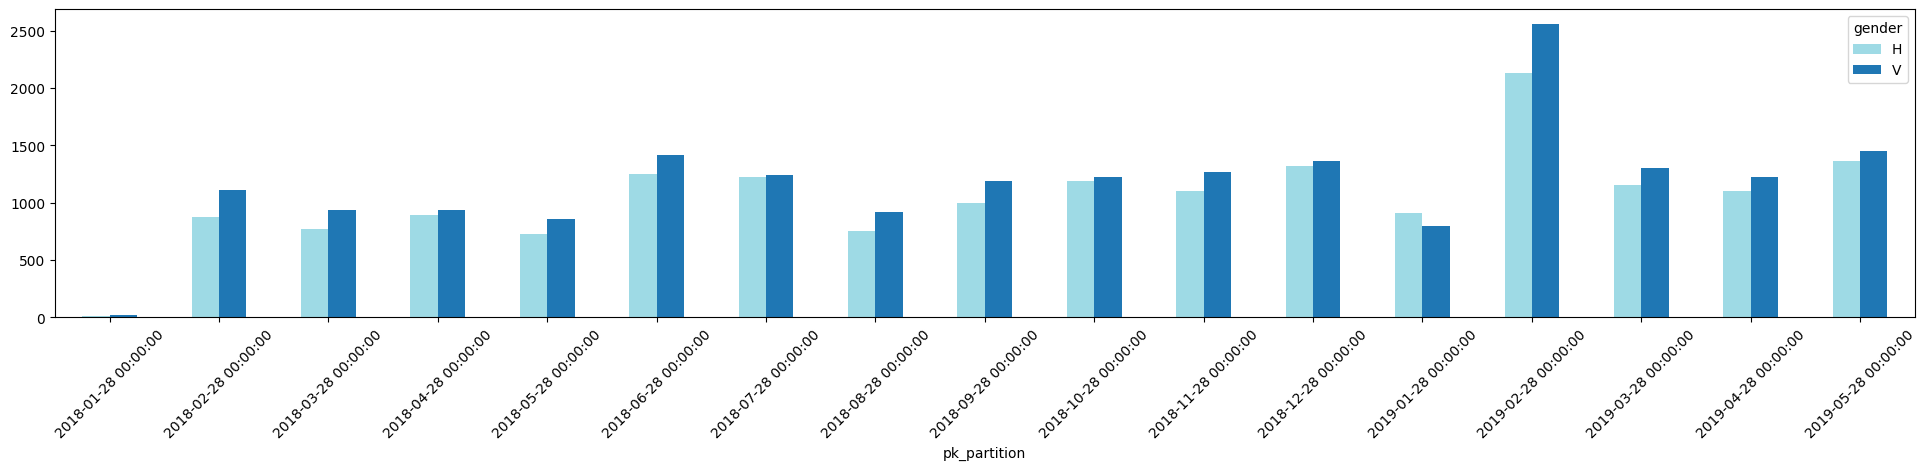

In [ ]:
df_pt1.plot.bar(stacked=False, figsize = [24,4], colormap='tab20_r')
plt.xticks(rotation=45)
plt.verbose = False

#SEGMENTACIÓN

Objetivo: Grupos de clientes similares

##Importación de librerías

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

##Clientes Actuales

In [ ]:
#Clientes Actuales y activos
clientes_actuales=clientes[(clientes['pk_partition']=='2019-05-28') & (clientes['isActive']==1)]

In [ ]:
clientes_actuales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331588 entries, 14 to 5962833
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   331588 non-null  int64         
 1   pk_cid                  331588 non-null  object        
 2   pk_partition            331588 non-null  datetime64[ns]
 3   country_id              331588 non-null  object        
 4   region_code             331588 non-null  object        
 5   gender                  331588 non-null  object        
 6   age                     331588 non-null  int64         
 7   deceased                331588 non-null  bool          
 8   salary                  331588 non-null  float64       
 9   entry_date              331588 non-null  datetime64[ns]
 10  entry_channel           331588 non-null  object        
 11  active_customer         331588 non-null  bool          
 12  segment                 3315

In [ ]:
clientes_actuales.head()

,index,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,...,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_account,meses_alta,isNewClient,isActive,total_productos
14,5523396,16203,2019-05-28,ES,8,V,70,False,163849.307065,2018-12-23,...,0.0,0.0,0.0,0.0,0.0,0.0,5.125362,0,1,1
23,5523395,16502,2019-05-28,ES,28,H,58,False,153086.517041,2018-09-30,...,0.0,0.0,0.0,0.0,0.0,0.0,7.885172,0,1,2
40,5523398,17457,2019-05-28,ES,28,H,54,False,102405.750000,2017-09-16,...,0.0,0.0,0.0,1.0,0.0,0.0,20.337173,0,1,3
68,5523390,17799,2019-05-28,ES,28,H,47,False,84511.860000,2018-01-04,...,0.0,0.0,0.0,0.0,0.0,0.0,16.723136,0,1,1
85,5523387,17970,2019-05-28,ES,28,V,76,False,153086.517041,2015-04-16,...,0.0,0.0,0.0,0.0,0.0,0.0,49.380891,0,1,5


In [ ]:
#Para la segmentación/recomendación no tendremos en cuenta los clientes fallecidos
clientes_actuales[clientes_actuales['deceased']==True].groupby('pk_cid').size()
#En los clientes actuales existen 61

pk_cid
81958      1
396977     1
733623     1
1007836    1
1009307    1
          ..
1397405    1
1398250    1
1399743    1
1403939    1
1441140    1
Length: 61, dtype: int64

In [ ]:
#clientes_actuales.drop(clientes_actuales[clientes_actuales['deceased']==True].index, inplace=True)
clientes_actuales.drop(clientes_actuales.loc[clientes_actuales['deceased']==True].index, inplace=True)


<ipython-input-173-66510a6c6853>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Clústers

In [ ]:
variable_segmentacion=['total_productos','salary','age']

In [ ]:
# Elbow-curve/SSD
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(clientes_actuales[variable_segmentacion])
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Las mejores opciones son 2 o 6 clústers. Escogeremos 6
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=6))
        ]
)

In [ ]:
pipe.fit(clientes_actuales[variable_segmentacion])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=6))])

In [ ]:
clientes_actuales['Cluster'] = pipe.predict(clientes_actuales[variable_segmentacion])

<ipython-input-178-50af45b33407>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clientes_actuales

,index,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,...,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_account,meses_alta,isNewClient,isActive,total_productos,Cluster
14,5523396,16203,2019-05-28,ES,8,V,70,False,163849.307065,2018-12-23,...,0.0,0.0,0.0,0.0,0.0,5.125362,0,1,1,0
23,5523395,16502,2019-05-28,ES,28,H,58,False,153086.517041,2018-09-30,...,0.0,0.0,0.0,0.0,0.0,7.885172,0,1,2,0
40,5523398,17457,2019-05-28,ES,28,H,54,False,102405.750000,2017-09-16,...,0.0,0.0,1.0,0.0,0.0,20.337173,0,1,3,4
68,5523390,17799,2019-05-28,ES,28,H,47,False,84511.860000,2018-01-04,...,0.0,0.0,0.0,0.0,0.0,16.723136,0,1,1,3
85,5523387,17970,2019-05-28,ES,28,V,76,False,153086.517041,2015-04-16,...,0.0,0.0,0.0,0.0,0.0,49.380891,0,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962748,5679860,1553456,2019-05-28,ES,28,H,32,False,156438.979333,2019-05-30,...,0.0,0.0,0.0,0.0,0.0,-0.065710,0,1,1,5
5962809,5679799,1553541,2019-05-28,ES,49,V,54,False,83519.478750,2019-05-31,...,0.0,0.0,0.0,0.0,0.0,-0.098565,0,1,1,0
5962824,5679954,1553559,2019-05-28,ES,8,H,43,False,158409.507512,2019-05-31,...,0.0,0.0,0.0,0.0,0.0,-0.098565,0,1,1,3
5962829,5679949,1553565,2019-05-28,ES,45,H,68,False,71044.268768,2019-05-31,...,0.0,0.0,0.0,0.0,0.0,-0.098565,0,1,1,0


In [ ]:
clientes_actuales.groupby('Cluster').agg({
                                        'total_productos':np.mean,
                                         'salary':np.mean,
                                         'age':[np.mean,np.max,np.min]
                                        })

total_productos        salary        age          
                   mean          mean       mean amax amin
Cluster                                                   
0              1.465967  1.235079e+05  62.531722  105   49
1              1.325231  1.248996e+06  30.210648   94   12
2              1.307692  1.295194e+07  30.807692   59   20
3              1.381075  1.069961e+05  39.209370   51   28
4              3.824719  1.145231e+05  37.589499   94   20
5              1.033165  1.055145e+05  23.847928   32    3

**Cluster Junior**: 1 producto contratado de media, 105.514 de media de salario, y casi 24 años de edad media




**Cluster Senior**: 1 producto y medio contratado, 123.507 como media de salario, y una edad media de más de 62 años


**Cluster Los 40**: Un poco más de 1 producto contratado de media, 106.996 de media de salario, y una media de 39 años


**Cluster Los nuevos 20**: Un poco más de 1 producto contratado, 129.519 como media de salario, y una edad media de 30 años

**Cluster Angels**: Casi 4 productos contratado de media, 114.523 de media de salario, y una media de 37 años

**Cluster Perezosos**: Un 1 producto contratado, 124.899 como media de salario, y una edad media de 30 años

In [ ]:
clientes_actuales['Cluster'].value_counts()

5    223039
3     62817
4     23140
0     21641
1       864
2        26
Name: Cluster, dtype: int64

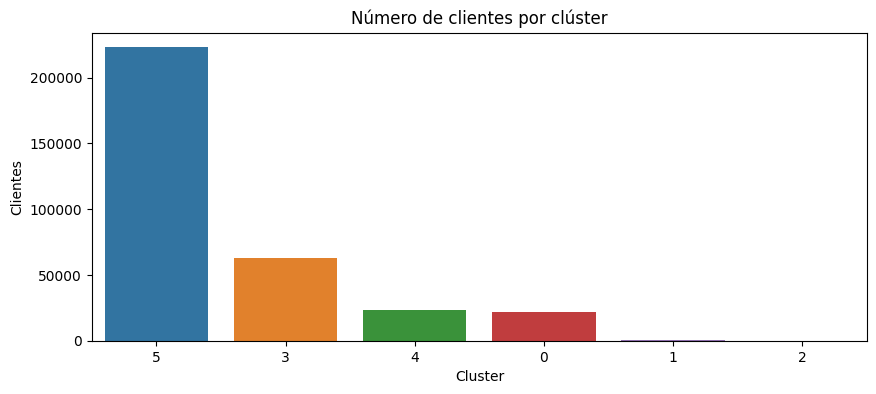

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="Cluster", data=clientes_actuales, order = clientes_actuales['Cluster'].value_counts().index)
plt.xlabel('Cluster')
plt.ylabel('Clientes')
plt.title('Número de clientes por clúster');

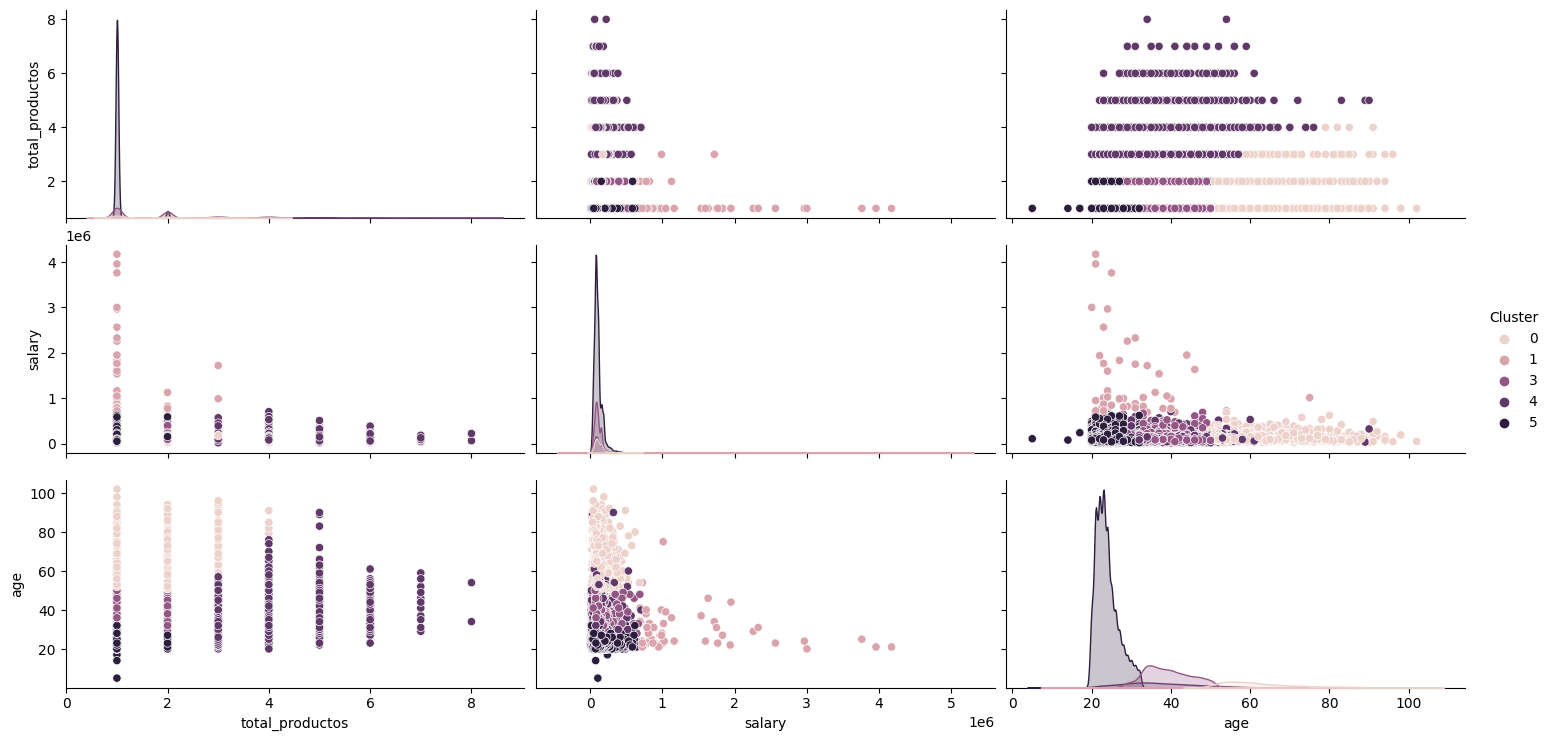

In [ ]:
sns.distributions._has_statsmodels = False
sns.pairplot(clientes_actuales.sample(20000), vars=variable_segmentacion, hue='Cluster', aspect=2)
plt.show()

#RECOMENDACIÓN

Objetivo: Recomendar el producto que más interese y se pueda obtener más ganancias. Enviar 10000 emails, en donde debe estar identificado el cliente y el segmento

Lista de productos con suficientes datos para entrenar (Por lo menos alrededor de 1000 altas): 
* credit_card 
* payroll
* pension_plan
* payroll_account
* emc_account
* debit_card 
* em_account

##Importación de librerías

In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
import graphviz

In [ ]:
#El objetivo es predecir un top en probabilidad de compra por cada uno de los productos, teniendo en cuenta solo los clientes activos el último mes
#Variables comunes
categorical_list = ['country_id','region_code','gender','entry_channel','segment']
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 42)

##Funciones

###OneHot-Encoding

In [ ]:
 #función para hacer OneHotEncoding
def OHE(dataframe, column_name):
  dummy_df = pd.get_dummies(dataframe[column_name], prefix = column_name)
  dataframe = pd.concat([dataframe, dummy_df], axis=1)
  return dataframe.drop(column_name, axis=1)

###Inicializar Clientes Actuales

In [ ]:
def inicializar_clientes_actuales():
  global clientes_actuales
  dataframe = clientes_actuales.copy()
  dataframe.drop(['Cluster'], axis=1, inplace=True)

  return dataframe

###Preparar dataframe dev

In [ ]:
 #función para obtener dataframe a entrenar
 #Después de revisar las altas por mes, pensamos que con las del mes anterior tenemos suficientes datos
 #Igualaremos el numero de sin altas al de altas para tener una muestra balanceada
def obtener_df_dev(column_name):
  particion = '2019-04-28'
  ventas1=clientes[(clientes['pk_partition'] == particion) & (clientes['isActive']==1) & (clientes['dif_' + column_name] == 1) ]
  ventas0=clientes[(clientes['pk_partition'] == particion) & (clientes['isActive']==1) & (clientes['dif_' + column_name] == 0) ].iloc[:len(ventas1.index)]
  dataframe = pd.concat([ventas1,ventas0],ignore_index=True )
  
  #Combinamos ventas con los clientes actuales y así tener variables unificadas para la predicción
  lista = clientes_actuales_ventas['entry_channel'].unique().tolist()
  dataframe.drop(dataframe[~dataframe['entry_channel'].isin(lista)].index, inplace=True)

  dataframe = pd.concat([dataframe,clientes_actuales_ventas],ignore_index=True)
  
  #Eliminamos columnas que no influyen en el modelo
  dataframe.drop(['dif_short_term_deposit','dif_loans','dif_mortgage','dif_funds','dif_securities','dif_long_term_deposit','dif_em_account_pp','dif_credit_card'], axis=1, inplace=True)
  dataframe.drop(['dif_payroll','dif_pension_plan','dif_payroll_account','dif_emc_account','dif_debit_card','dif_em_account_p','dif_em_account'], axis=1, inplace=True)
  dataframe.drop(['entry_date','active_customer','deceased','isActive'], axis=1, inplace=True)

  #Aplicamos OneHotEncoding a las variables Categóricas/Object
  for i in categorical_list:
    dataframe = OHE(dataframe, i)

  #Eliminaremos las filas de la partición de la última fecha
  dataframe.drop(dataframe[dataframe['pk_partition'] == '2019-05-28'].index, inplace=True)

  #Eliminamos la columna de fecha del snapshot y gestionamos el índice
  dataframe.drop(['pk_partition'], axis=1, inplace=True)
  dataframe.set_index('pk_cid', inplace=True)
  dataframe.drop(['index'], axis=1, inplace=True)

  return dataframe

###Preparar dataframe recomendación

In [ ]:
def obtener_df_val(dataframe):
  #Eliminamos columnas que no influyen en el modelo
  dataframe.drop(['dif_short_term_deposit','dif_loans','dif_mortgage','dif_funds','dif_securities','dif_long_term_deposit','dif_em_account_pp','dif_credit_card'], axis=1, inplace=True)
  dataframe.drop(['dif_payroll','dif_pension_plan','dif_payroll_account','dif_emc_account','dif_debit_card','dif_em_account_p','dif_em_account'], axis=1, inplace=True)
  dataframe.drop(['pk_partition','entry_date','active_customer','deceased','isActive'], axis=1, inplace=True)

  #OHE para las variables categóricas
  for column in categorical_list:
    dataframe = OHE(dataframe, column)

  #Ajustamos el índice al código del cliente
  dataframe.set_index('pk_cid', inplace=True)
  dataframe.drop(['index'], axis=1, inplace=True)

  return dataframe

##debit_card

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'debit_card'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)


###Dataframes Entrenamiento

In [ ]:
ventas.shape

(10005, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)

In [ ]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
age,7503.0,41.944689,14.708897,20.00,31.000000,40.00,50.000000,101.00
salary,7503.0,129366.898509,236451.320685,7507.32,77239.939626,104163.87,153086.517041,13268621.28
short_term_deposit,7503.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00
loans,7503.0,0.000133,0.011545,0.00,0.000000,0.00,0.000000,1.00
mortgage,7503.0,0.000400,0.019993,0.00,0.000000,0.00,0.000000,1.00


In [ ]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
age,2502.0,41.893685,14.720367,20.0,31.000000,40.000000,50.000000,98.00
salary,2502.0,132683.051194,183685.650533,12219.9,77239.939626,107746.626639,153086.517041,5784533.07
short_term_deposit,2502.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
loans,2502.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
mortgage,2502.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00


In [ ]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
debit_card,7503.0,0.629215,0.483047,0.0,0.0,1.0,1.0,1.0


In [ ]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
debit_card,2502.0,0.641487,0.47966,0.0,0.0,1.0,1.0,1.0


###Random Forest

In [ ]:
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
tree_list[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf_tree0 = export_graphviz(
    tree_list[1], 
    out_file=None, 
     max_depth=None, 
     feature_names=X_test.columns, 
     class_names=['No product', 'Producto'], 

     filled=True, 
     leaves_parallel=False, 
     impurity=True, 
     node_ids=False, 
     proportion=True, 
     rotate=True, 
     rounded=False, 
     special_characters=False, 
     precision=3, 
     fontname='helvetica')

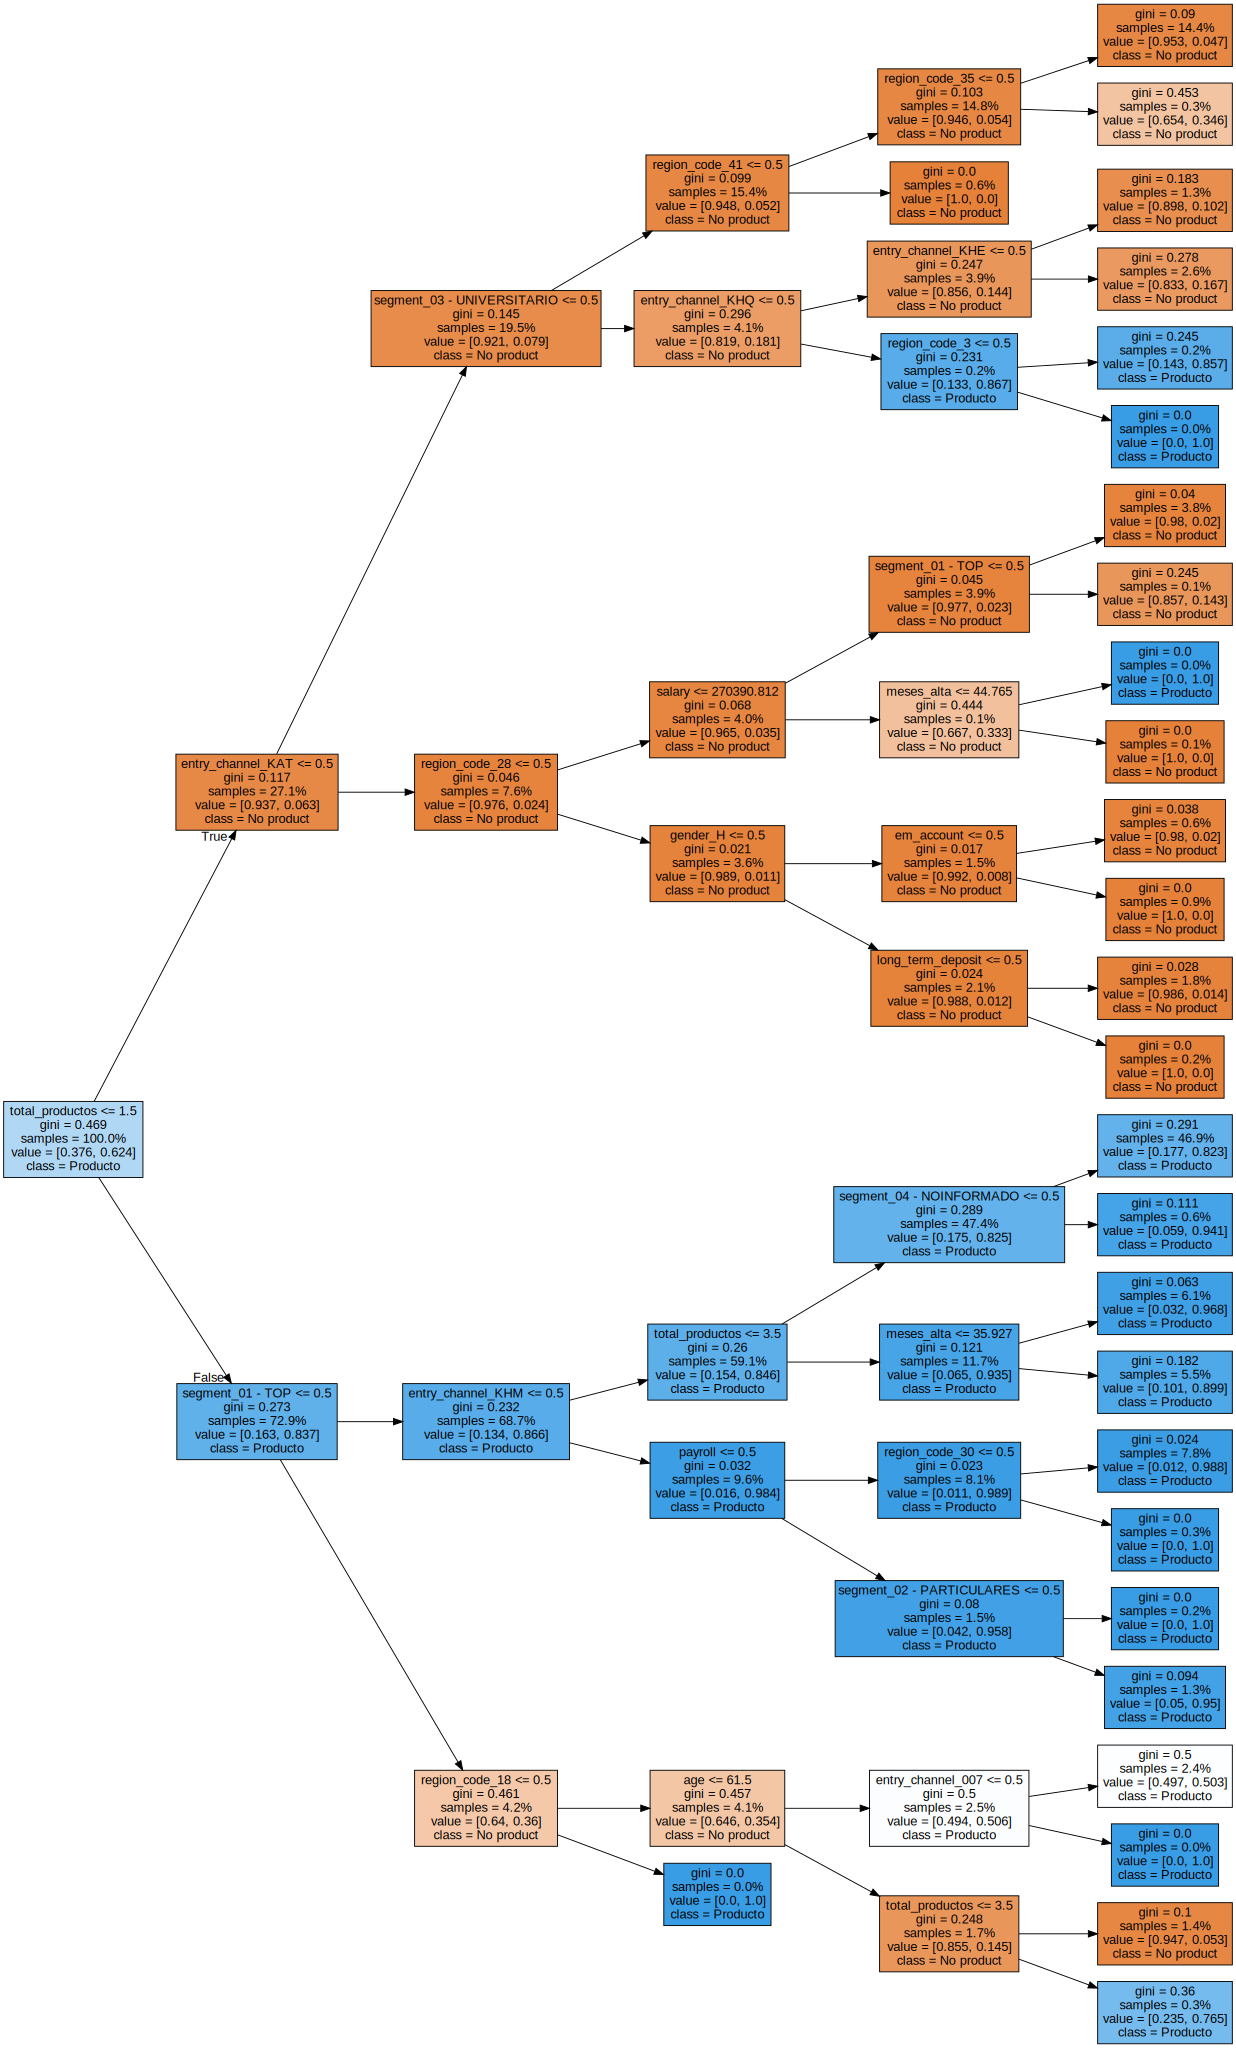

In [ ]:
graphviz.Source(rf_tree0)

###Top importancia variables

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

total_productos               0.426281
meses_alta                    0.119597
long_term_deposit             0.080750
payroll                       0.065922
segment_03 - UNIVERSITARIO    0.061110
age                           0.042462
pension_plan                  0.035694
salary                        0.022816
payroll_account               0.022797
segment_01 - TOP              0.017610
entry_channel_KHM             0.016233
region_code_28                0.015920
entry_channel_KAT             0.013807
em_account                    0.012880
segment_02 - PARTICULARES     0.008974
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_test)[:,1], index = y_test.index, columns = ['ProductScore'])

In [ ]:
results_df_rf = y_test.join(y_score_rf)

In [ ]:
results_df_rf [results_df_rf[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,debit_card,ProductScore
pk_cid,,
959404,0,0.911329
855583,0,0.889181
1004067,0,0.877924
913747,0,0.847179
829532,0,0.846074
...,...,...
269711,0,0.089366
448932,0,0.087926
301477,0,0.087926


In [ ]:
#Ahora aplicaremos el modelo a los clientes activos en el último mes
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])

In [ ]:
results_df_rf = y_val.join(y_score_rf)

In [ ]:
results_df_rf [results_df_rf[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,debit_card,ProductScore
pk_cid,,
1542802,0,0.952723
1541412,0,0.952723
1541944,0,0.952723
1536300,0,0.952577
1517220,0,0.952577
...,...,...
31657,0,0.087926
301477,0,0.087926
1299183,0,0.086881


###Top Email

In [ ]:
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])

In [ ]:
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,debit_card,ProductScore,Cluster
327815,1542802,0,0.952723,4
327190,1541412,0,0.952723,4
327437,1541944,0,0.952723,4
324965,1536300,0,0.952577,4
315403,1517220,0,0.952577,4
...,...,...,...,...
35,31657,0,0.087926,0
819,301477,0,0.087926,0
185657,1299183,0,0.086881,0
102,53626,0,0.079990,0


<Axes: >

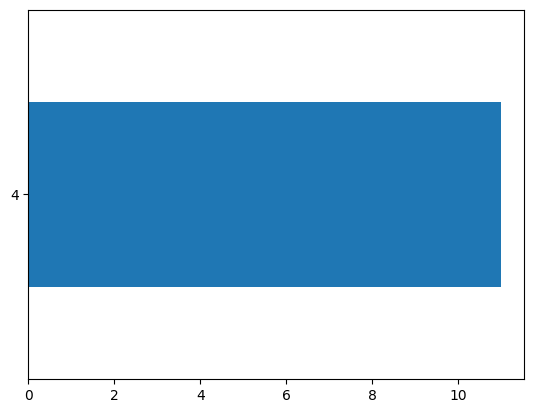

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()

##credit_card

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'credit_card'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(1424, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

age                           0.226866
total_productos               0.193765
entry_channel_KFC             0.062469
segment_03 - UNIVERSITARIO    0.058348
payroll                       0.053906
gender_H                      0.045115
pension_plan                  0.040295
payroll_account               0.036134
gender_V                      0.034803
em_account                    0.026824
region_code_28                0.026468
long_term_deposit             0.022931
segment_02 - PARTICULARES     0.021801
debit_card                    0.018742
emc_account                   0.018039
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,credit_card,ProductScore,Cluster
12576,1022786,0,1.000000,4
158479,1252904,0,1.000000,4
118737,1185022,0,0.995480,4
168867,1274038,0,0.995480,4
152054,1238271,0,0.995480,4
...,...,...,...,...
256051,1421108,0,0.143917,0
164381,1266609,0,0.143370,0
244046,1403484,0,0.143370,0
238870,1392849,0,0.131569,0


<Axes: >

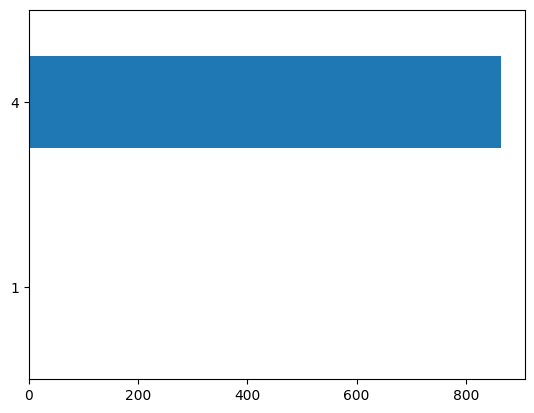

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()

##payroll

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'payroll'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(4373, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

pension_plan                  0.277548
total_productos               0.265054
payroll_account               0.209890
age                           0.084341
segment_03 - UNIVERSITARIO    0.054898
em_account                    0.025462
long_term_deposit             0.018195
entry_channel_KHE             0.013603
entry_channel_KAT             0.008855
meses_alta                    0.008004
salary                        0.006278
entry_channel_KFA             0.003797
debit_card                    0.003620
funds                         0.002854
emc_account                   0.002485
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,payroll,ProductScore,Cluster
243656,1402713,0,0.975698,4
154013,1242628,0,0.974041,4
116785,1182200,0,0.970085,4
94330,1150439,0,0.970085,4
229120,1371167,0,0.969667,4
...,...,...,...,...
194630,1312430,0,0.009126,0
157996,1251820,0,0.009126,3
192,92038,0,0.009126,0
272207,1445610,0,0.007539,0


<Axes: >

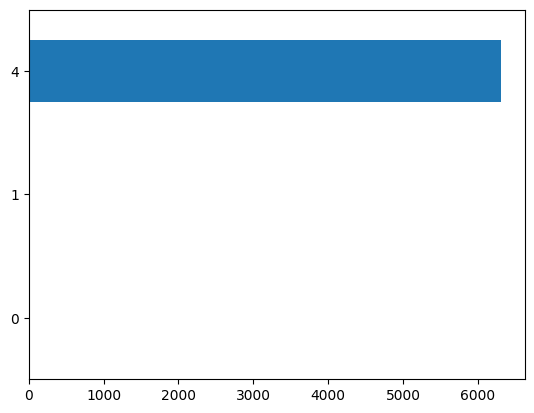

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()

##pension_plan

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'pension_plan'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(4645, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

payroll                       0.276224
total_productos               0.176182
payroll_account               0.168528
segment_03 - UNIVERSITARIO    0.115676
long_term_deposit             0.051582
entry_channel_KAT             0.039637
entry_channel_KHM             0.032326
segment_01 - TOP              0.025184
entry_channel_KHE             0.022389
debit_card                    0.014663
segment_02 - PARTICULARES     0.012811
gender_H                      0.011190
salary                        0.010361
emc_account                   0.007776
em_account                    0.006274
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,pension_plan,ProductScore,Cluster
184942,1297793,0,0.893801,4
78030,1118091,0,0.855278,4
216028,1344826,0,0.848052,4
164679,1267272,0,0.840032,4
100250,1158113,0,0.825033,4
...,...,...,...,...
185473,1298765,0,0.024135,4
161154,1259138,0,0.022710,0
104828,1164052,0,0.022640,4
236924,1388871,0,0.021683,4


<Axes: >

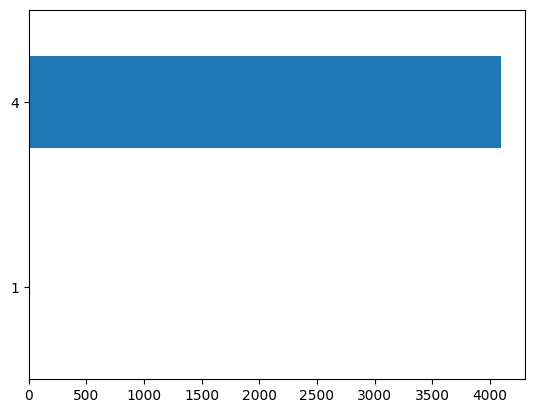

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()



##payroll_account

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'payroll_account'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(2949, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

total_productos               0.214436
pension_plan                  0.153602
payroll                       0.146455
age                           0.141164
segment_03 - UNIVERSITARIO    0.080102
entry_channel_KHM             0.064303
debit_card                    0.047400
long_term_deposit             0.046906
em_account                    0.024757
funds                         0.009880
salary                        0.009866
entry_channel_KAT             0.009325
meses_alta                    0.007721
securities                    0.004859
entry_channel_007             0.004460
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,payroll_account,ProductScore,Cluster
280312,1456916,0,0.998742,4
273457,1447485,0,0.998742,4
326506,1539891,0,0.998742,4
242194,1399791,0,0.998742,4
159001,1254119,0,0.997974,4
...,...,...,...,...
208953,1332578,0,0.096338,0
81604,1126484,0,0.096338,3
2514,828138,0,0.096338,0
80708,1124426,0,0.096338,0


<Axes: >

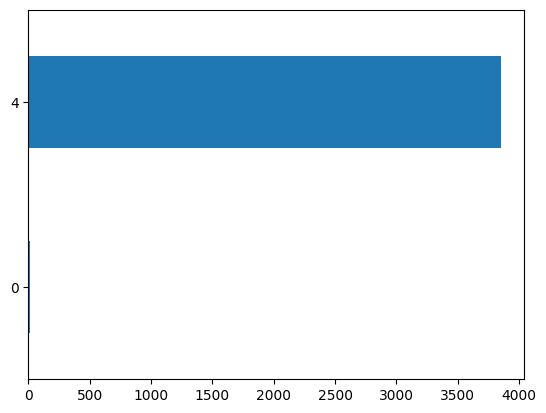

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()

##emc_account

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'emc_account'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(2565, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

total_productos               0.179525
age                           0.164836
meses_alta                    0.118437
entry_channel_KHM             0.098411
entry_channel_KAT             0.085462
segment_02 - PARTICULARES     0.046011
credit_card                   0.024972
entry_channel_KHN             0.024743
segment_03 - UNIVERSITARIO    0.020997
entry_channel_013             0.018414
em_account                    0.017568
gender_H                      0.016402
salary                        0.016362
pension_plan                  0.015603
gender_V                      0.014668
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,emc_account,ProductScore,Cluster
253646,1417737,0,0.965155,3
319925,1526005,0,0.962903,4
241840,1399076,0,0.959134,4
250946,1413784,0,0.959134,4
11295,1020043,0,0.958445,4
...,...,...,...,...
167,79841,0,0.266185,0
2004,679714,0,0.266185,0
71482,1106235,0,0.266185,3
492,187108,0,0.266185,3


<Axes: >

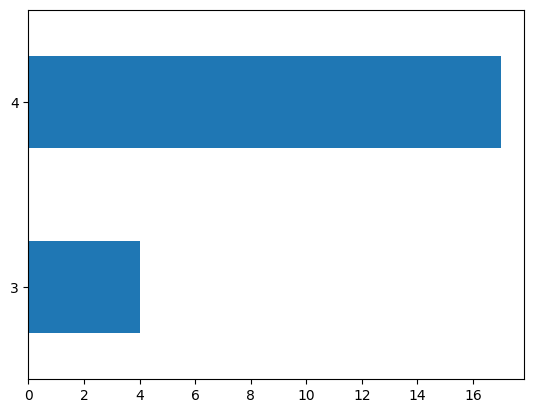

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()

##em_account

In [ ]:
clientes_actuales_ventas = inicializar_clientes_actuales()
TARGET = 'em_account'
ventas = obtener_df_dev(TARGET)
clientes_actuales_ventas = obtener_df_val(clientes_actuales_ventas)

In [ ]:
ventas.shape

(8391, 172)

In [ ]:
dev_df_X = ventas.drop(TARGET, axis=1)
dev_df_y = ventas[[TARGET]]
X_val = clientes_actuales_ventas.drop(TARGET, axis=1)
y_val = clientes_actuales_ventas[[TARGET]]

X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=.25, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
top_features = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
top_features.head(15)

payroll_account               0.308349
total_productos               0.145082
pension_plan                  0.092020
credit_card                   0.081764
payroll                       0.063637
meses_alta                    0.051090
emc_account                   0.047085
isNewClient                   0.042237
age                           0.031040
segment_04 - NOINFORMADO      0.030867
entry_channel_ZZZ             0.023388
long_term_deposit             0.019931
segment_03 - UNIVERSITARIO    0.009467
entry_channel_KHN             0.009370
debit_card                    0.005151
dtype: float64

In [ ]:
y_score_rf = pd.DataFrame(rf.predict_proba(X_val)[:,1], index = y_val.index, columns = ['ProductScore'])
results_df_rf = y_val.join(y_score_rf)
email = pd.merge(results_df_rf, clientes_actuales[["pk_cid","Cluster"]], how="left",on=['pk_cid'])
email [email[TARGET] == 0].sort_values(by = 'ProductScore', ascending=False)

,pk_cid,em_account,ProductScore,Cluster
330357,1549042,0,0.961754,3
328079,1543366,0,0.960621,5
328840,1545189,0,0.954284,5
287504,1467259,0,0.952411,4
242017,1399439,0,0.944511,4
...,...,...,...,...
158820,1253738,0,0.146345,4
3743,1001147,0,0.145488,4
162183,1261682,0,0.141207,4
1119,402892,0,0.138353,4


<Axes: >

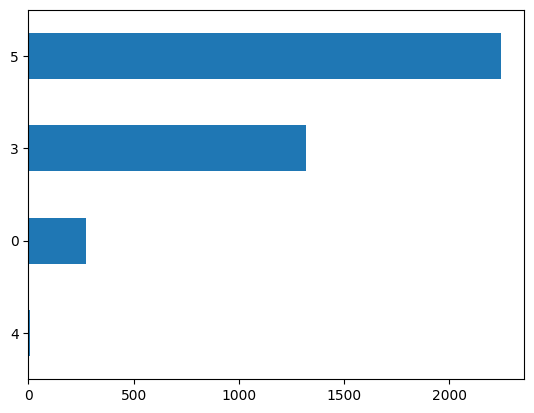

In [ ]:
email[email['ProductScore'] > 0.95]['Cluster'].value_counts().sort_values().plot.barh()